<a href="https://colab.research.google.com/github/NicoloAvesani/project/blob/main/project_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__NICOLO' AVESANI VR490189 PROGRAMMING FINAL PROJECT 2022-2023__

I'm Nicolò Avesani, Data Science student in Verona. 
My project is focused on a dataset called 'Tourist Residences in Veneto'.

The dataset has 8504 rows and 45 columns, describing all the main characteristics of the tourist residences in Veneto (Italy), suh as the presence of: private pool, restaurant, private parking spots, staff ready to speak in several languages.

Structures are divided in 7 Districts, the so-called 'Province', which are: Belluno, Padova, Rovigo, Treviso, Venezia, Verona, Vicenza. .

The aim of my project is to find out if there is a positive correlation between the main descriptive variables and the classification of the tourist residences.

In [140]:
## 1 EXPLORE THE DATASET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

## import dataset with pandas 

tourism_structures_df = pd.read_csv('https://www.veneto.eu/static/opendata/dove-alloggiare.csv')


In [ ]:
tourism_structures_df

In [ ]:
## information of original dataset
tourism_structures_df.info()

In [143]:
## Since the majority of data are string values, so I need to transform them into boolean values with 1 for True(Vero) and 0 for False (Falso)

for i in range(len(tourism_structures_df)):
  for j in tourism_structures_df.columns:
    if (tourism_structures_df[j][i] == 'Vero') | (tourism_structures_df[j][i] == 'Falso'):
      tourism_structures_df[j] = tourism_structures_df[j].map({'Vero':1,'Falso':0}) 

In [ ]:
## Changed dataframe, descriptive variables are boolean values
tourism_structures_df

In [ ]:
## i want to see the informations of the dataset

tourism_structures_df.info()

## as i can see, the dataset has a total of 8504 entries and 45 clolumns

In [ ]:
## description of df
tourism_structures_df.describe().T

In [ ]:
## create a copy of the original dataframe in order to drop some problematic and useless columns that I will not use in my analysis.
## 'Problematic' since they have null values.

## The dropped columns are: LOCATION, SECONDARY TYPE, ADDRESS, HOUSE NUMBER, INTERNAL, ZIP CODE, PHONE, FAX, EMAIL ADDRESS, WEBSITE, AREA, LAST EDIT, IDENTIFICATION CODE.
## These columns provide useless information, since they concern only the single residential facility, and are linked to contact information. 
## The columns I am interested in are those which provide me information about the presence or not of descriptive characteristics of the tourist residences

## I also drop the following columns that, even if they provide information about descriptive characteristics, are not relevant for my purposes:
## INDOOR SWIMMING POOL, CONFERENCE ROOM, SOLARIUM, OUTSKIRTS, HILLS

tourism_df = tourism_structures_df.copy()

tourism_df = tourism_df.drop(tourism_df.columns[[2,4,6,7,8,9,10,11,12,13,14,16,19,23,35,36,42,43]],axis=1)

tourism_df.info()



In [149]:
## groupby mean to see the average number of TR by Provincia
tourism_groupby_mean = tourism_df.groupby(['PROVINCIA']).mean()

In [ ]:
## try 
tourism_groupby_mean['INGLESE']

In [ ]:
tourism_groupby_mean.index

In [152]:
## I want to have the classification column fill with integer values, and drop the Nan values.

classification_nan_mask = tourism_df['CLASSIFICAZIONE'].isnull()
tourism_clear_class_df = tourism_df[classification_nan_mask == False]

new_indexes = []
for i in range(len(tourism_clear_class_df)):
    new_indexes.append(i)

tourism_clear_class_df.index = new_indexes


In [153]:
## see the classification values

np.sort(tourism_clear_class_df['CLASSIFICAZIONE'].unique())

array(['1 *', '2 **', '2 Leoni', '3 ***', '3 *** SUPERIOR', '3 Leoni',
       '4 ****', '4 **** SUPERIOR', '4 Leoni', '5 *****', '5 ***** lusso',
       '5 Leoni'], dtype=object)

In [ ]:
## I create new columns relative to different class of tourist residences


class_1 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '1 *':
    class_1.append(1)
  else:
    class_1.append(0)

tourism_clear_class_df['CLASS 1'] = class_1


class_2 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '2 **':
    class_2.append(1)
  else:
    class_2.append(0)

tourism_clear_class_df['CLASS 2'] = class_2

class_2_Leoni = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '2 Leoni':
    class_2_Leoni.append(1)
  else:
    class_2_Leoni.append(0)

tourism_clear_class_df['CLASS 2 Leoni'] = class_2_Leoni

class_3 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '3 ***' :
    class_3.append(1)
  else:
    class_3.append(0)

tourism_clear_class_df['CLASS 3'] = class_3

class_3_Leoni = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '3 Leoni' :
    class_3_Leoni.append(1)
  else:
    class_3_Leoni.append(0)

tourism_clear_class_df['CLASS 3 Leoni'] = class_3_Leoni

class_3_sup = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '3 *** SUPERIOR' :
    class_3_sup.append(1)
  else:
    class_3_sup.append(0)

tourism_clear_class_df['CLASS 3 SUPERIOR'] = class_3_sup

class_4 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '4 ****':
    class_4.append(1)
  else:
    class_4.append(0)

tourism_clear_class_df['CLASS 4'] = class_4

class_4_Leoni = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '4 Leoni' :
    class_4_Leoni.append(1)
  else:
    class_4_Leoni.append(0)

tourism_clear_class_df['CLASS 4 Leoni'] = class_4_Leoni

class_4_sup = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '4 **** SUPERIOR' :
    class_4_sup.append(1)
  else:
    class_4_sup.append(0)

tourism_clear_class_df['CLASS 4 SUPERIOR'] = class_4_sup

class_5 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '5 *****':
    class_5.append(1)
  else:
    class_5.append(0)

tourism_clear_class_df['CLASS 5'] = class_5

class_5_Leoni = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '5 Leoni':
    class_5_Leoni.append(1)
  else:
    class_5_Leoni.append(0)

tourism_clear_class_df['CLASS 5 Leoni'] = class_5_Leoni

class_5_luxury = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '5 ***** lusso':
    class_5_luxury.append(1)
  else:
    class_5_luxury.append(0)

tourism_clear_class_df['CLASS 5 LUXURY'] = class_5_luxury


## I also create an all lenguages column in which I will have 1 if the tourist residence speak all 4 lenguages

languages = []

for i in range(len(tourism_clear_class_df)):
    if (tourism_clear_class_df.loc[i, 'INGLESE'] == 1) & (tourism_clear_class_df.loc[i, 'TEDESCO'] == 1) & (tourism_clear_class_df.loc[i, 'FRANCESE'] == 1) & (tourism_clear_class_df.loc[i, 'SPAGNOLO'] == 1):
        languages.append(1)
    else:
        languages.append(0)

tourism_clear_class_df['LANGUAGES'] = languages

In [ ]:
## check the info
tourism_clear_class_df.info()

In [ ]:
## no more null values in classification
tourism_clear_class_df

In [157]:
## 
tourism_clear_class_groupby_mean = tourism_clear_class_df.groupby(['PROVINCIA']).mean()
tourism_clear_class_groupby_mean.T

PROVINCIA,BELLUNO,PADOVA,ROVIGO,TREVISO,VENEZIA,VERONA,VICENZA
PISCINA,0.044848,0.202532,0.089888,0.073874,0.177043,0.223814,0.049051
RISTORANTE,0.404848,0.403255,0.365169,0.288288,0.351751,0.296937,0.389241
PARCHEGGIO,0.829091,0.844485,0.887640,0.852252,0.545914,0.708004,0.762658
ARIA CONDIZIONATA,0.058182,0.793852,0.764045,0.675676,0.844358,0.619565,0.484177
GIOCHI BIMBI,0.303030,0.153707,0.213483,0.172973,0.207782,0.202075,0.177215
SAUNA,0.181818,0.166365,0.016854,0.055856,0.042023,0.057806,0.060127
FITNESS,0.058182,0.166365,0.044944,0.045045,0.060311,0.057806,0.042722
ANIMALI AMMESSI,0.476364,0.542495,0.601124,0.481081,0.539689,0.387352,0.479430
CENTRO STORICO,0.271515,0.245931,0.286517,0.221622,0.445136,0.269269,0.270570
ZONA FIERA,0.008485,0.050633,0.005618,0.009009,0.003502,0.041502,0.044304


In [158]:
tourism_clear_class_groupby_mean['INGLESE']

PROVINCIA
BELLUNO    0.734545
PADOVA     0.815552
ROVIGO     0.713483
TREVISO    0.816216
VENEZIA    0.833074
VERONA     0.768281
VICENZA    0.772152
Name: INGLESE, dtype: float64

In [159]:
tourism_clear_class_groupby_mean['CLASS 2 Leoni']

PROVINCIA
BELLUNO    0.290909
PADOVA     0.256781
ROVIGO     0.275281
TREVISO    0.342342
VENEZIA    0.234630
VERONA     0.326581
VICENZA    0.295886
Name: CLASS 2 Leoni, dtype: float64

In [160]:
## Now I can understand how many tourist residences by provincia has the characteristics in index

tourism_clear_class_groupby_sum = tourism_clear_class_df.groupby(['PROVINCIA']).sum()

tourism_clear_class_groupby_sum.T

PROVINCIA,BELLUNO,PADOVA,ROVIGO,TREVISO,VENEZIA,VERONA,VICENZA
PISCINA,37,112,16,41,455,453,31
RISTORANTE,334,223,65,160,904,601,246
PARCHEGGIO,684,467,158,473,1403,1433,482
ARIA CONDIZIONATA,48,439,136,375,2170,1254,306
GIOCHI BIMBI,250,85,38,96,534,409,112
SAUNA,150,92,3,31,108,117,38
FITNESS,48,92,8,25,155,117,27
ANIMALI AMMESSI,393,300,107,267,1387,784,303
CENTRO STORICO,224,136,51,123,1144,545,171
ZONA FIERA,7,28,1,5,9,84,28


In [161]:
## I create masks and df for every provincia

belluno_mask = tourism_clear_class_df['PROVINCIA'] == 'BELLUNO'
belluno_df = tourism_clear_class_df[belluno_mask]

padova_mask = tourism_clear_class_df['PROVINCIA'] == 'PADOVA'
padova_df = tourism_clear_class_df[padova_mask]

rovigo_mask = tourism_clear_class_df['PROVINCIA'] == 'ROVIGO'
rovigo_df = tourism_clear_class_df[rovigo_mask]

treviso_mask = tourism_clear_class_df['PROVINCIA'] == 'TREVISO'
treviso_df = tourism_clear_class_df[treviso_mask]

venezia_mask = tourism_clear_class_df['PROVINCIA'] == 'VENEZIA'
venezia_df = tourism_clear_class_df[venezia_mask]

verona_mask = tourism_clear_class_df['PROVINCIA'] == 'VERONA'
verona_df = tourism_clear_class_df[verona_mask]

vicenza_mask = tourism_clear_class_df['PROVINCIA'] == 'VICENZA'
vicenza_df = tourism_clear_class_df[vicenza_mask]

In [162]:
## length of the dfs that I have just created gives me the number of tourist residences by provincia

belluno_tr = len(belluno_df)

padova_tr = len(padova_df)

treviso_tr = len(treviso_df)

rovigo_tr = len(rovigo_df)

venezia_tr = len(venezia_df)

verona_tr = len(verona_df)

vicenza_tr = len(vicenza_df)

city_len = [belluno_tr , padova_tr, treviso_tr, rovigo_tr, venezia_tr, verona_tr, vicenza_tr]

In [163]:
city_len

[825, 553, 555, 178, 2570, 2024, 632]

In [164]:
## verify that there is no mistakes

len(tourism_clear_class_df) == belluno_tr + padova_tr + treviso_tr + rovigo_tr + venezia_tr + verona_tr + vicenza_tr

True

In [165]:
## descriptive data

belluno_descriptive = tourism_clear_class_groupby_sum.T['BELLUNO']
padova_descriptive = tourism_clear_class_groupby_sum.T['PADOVA']
treviso_descriptive = tourism_clear_class_groupby_sum.T['TREVISO']
rovigo_descriptive = tourism_clear_class_groupby_sum.T['ROVIGO']
venezia_descriptive = tourism_clear_class_groupby_sum.T['VENEZIA']
verona_descriptive = tourism_clear_class_groupby_sum.T['VERONA']
vicenza_descriptive = tourism_clear_class_groupby_sum.T['VICENZA']

city_list = [belluno_descriptive, padova_descriptive, treviso_descriptive, rovigo_descriptive, venezia_descriptive, verona_descriptive, vicenza_descriptive]


In [166]:
city_len

[825, 553, 555, 178, 2570, 2024, 632]

In [167]:
len_prov = {'BELLUNO':825, 'PADOVA':553, 'TREVISO':555, 'ROVIGO':178, 'VENEZIA':2570, 'VERONA':2024, 'VICENZA':632}
len_prov = pd.Series(len_prov)
len_prov_df = pd.DataFrame(len_prov)
len_prov_df.columns = ['# TR']
len_prov_df

,# TR
BELLUNO,825
PADOVA,553
TREVISO,555
ROVIGO,178
VENEZIA,2570
VERONA,2024
VICENZA,632


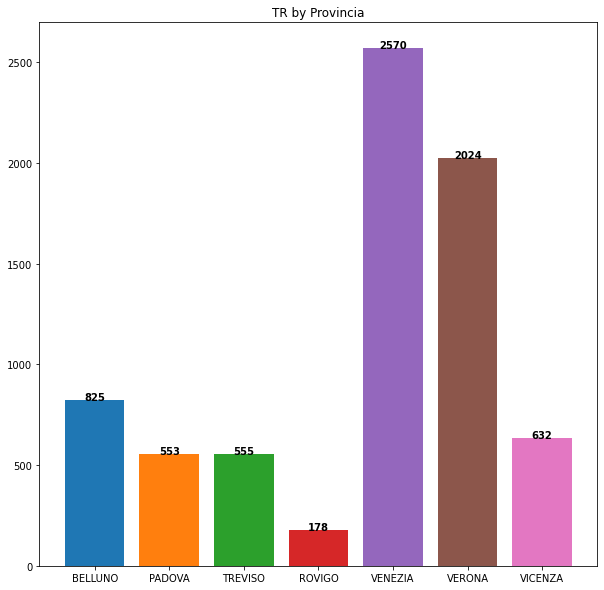

In [168]:
## which provincia has the higher number of TR?


province = [
    'BELLUNO',
    'PADOVA',
    'TREVISO',
    'ROVIGO',
    'VENEZIA',
    'VERONA',
    'VICENZA'
]

plt.figure(figsize=(10,10))
plt.title('TR by Provincia')
for i in range(len(city_list)):
  plt.bar(province[i], city_len[i])
  plt.text(province[i], city_len[i], str(city_len[i]), ha='center', weight='bold')

In [169]:
import folium

city_coordinates = {
    'Belluno': [46.13, 12.21],
    'Padova': [45.40, 11.87],
    'Rovigo': [45.17, 11.80],
    'Treviso': [45.66, 12.24],
    'Venezia': [45.44, 12.33],
    'Verona': [45.44, 10.99],
    'Vicenza': [45.55, 11.54]
}

# Create the map centered on the average latitude and longitude
mean_lat = sum(coord[0] for coord in city_coordinates.values()) / len(city_coordinates)
mean_lon = sum(coord[1] for coord in city_coordinates.values()) / len(city_coordinates)

m = folium.Map(location=[mean_lat, mean_lon], zoom_start=8)

# Add markers for each city
for city, coord in city_coordinates.items():
    folium.Marker(coord, popup=city).add_to(m)

m.save('map.html')

from IPython.display import display
display(m)

In [170]:
city_coordinates = {
    'Belluno': [46.13, 12.21],
    'Padova': [45.40, 11.87],
    'Rovigo': [45.17, 11.80],
    'Treviso': [45.66, 12.24],
    'Venezia': [45.44, 12.33],
    'Verona': [45.44, 10.99],
    'Vicenza': [45.55, 11.54]
}
city_df_map = pd.DataFrame(city_coordinates).T
city_df_map.columns = ['LAT','LON']
city_df_map

,LAT,LON
Belluno,46.13,12.21
Padova,45.40,11.87
Rovigo,45.17,11.80
Treviso,45.66,12.24
Venezia,45.44,12.33
Verona,45.44,10.99
Vicenza,45.55,11.54


What Provincia do you want to analyze? (digit a provincia among these: BELLUNO, PADOVA, TREVISO, ROVIGO, VENEZIA, VERONA, VICENZA)verona


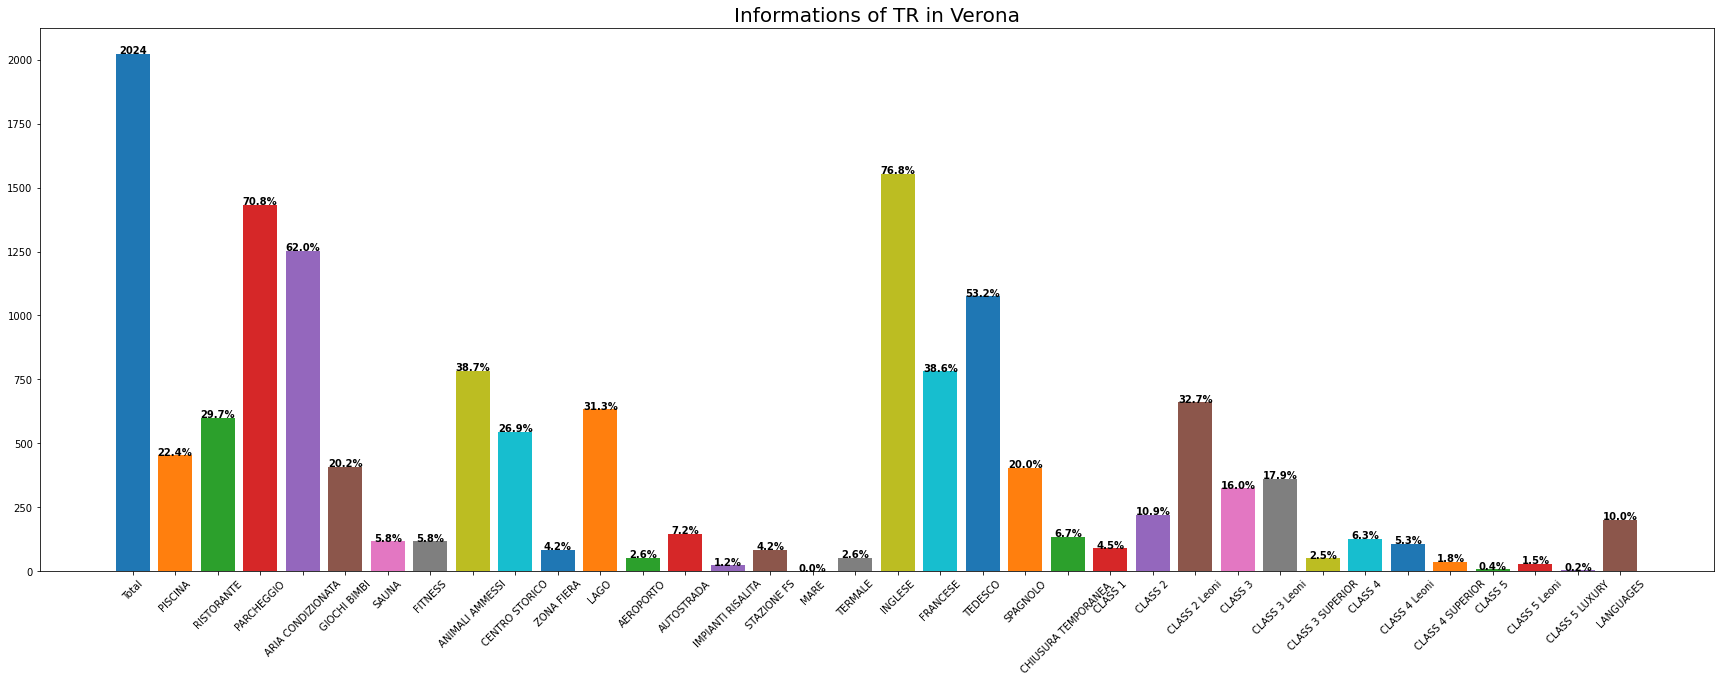

In [171]:
## tourist residences with every characteristic and percentage by provincia 

plt.figure(figsize=(30,10))



city = input('What Provincia do you want to analyze? (digit a provincia among these: BELLUNO, PADOVA, TREVISO, ROVIGO, VENEZIA, VERONA, VICENZA)').upper()

if city == 'BELLUNO':
  plt.title('Informations of TR in Belluno', fontsize= 20)
  plt.bar('Total', city_len[0])
  plt.text('Total',city_len[0], str(city_len[0]), ha='center', weight='bold')
  for i in range(len(belluno_descriptive)):
    plt.bar(belluno_descriptive.index[i], belluno_descriptive[i])
    plt.xticks(rotation=45)
    number = round((belluno_descriptive[i]/belluno_tr)*100,1)
    plt.text(belluno_descriptive.index[i], belluno_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
  

elif city == 'PADOVA':
  plt.title('Informations of TR in Padova', fontsize= 20)
  plt.bar('Total', city_len[1])
  plt.text('Total',city_len[1], str(city_len[1]), ha='center', weight='bold')
  for i in range(len(padova_descriptive)):
    plt.bar(padova_descriptive.index[i], padova_descriptive[i])
    plt.xticks(rotation=45)
    number = round((padova_descriptive[i]/padova_tr)*100,1)
    plt.text(padova_descriptive.index[i], padova_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
  

elif city == 'TREVISO':
  plt.title('Informations of TR in Treviso', fontsize= 20)
  plt.bar('Total', city_len[2])
  plt.text('Total',city_len[2], str(city_len[2]), ha='center', weight='bold')
  for i in range(len(treviso_descriptive)):
    plt.bar(treviso_descriptive.index[i], treviso_descriptive[i])
    plt.xticks(rotation=45)
    number = round((treviso_descriptive[i]/treviso_tr)*100,1)
    plt.text(treviso_descriptive.index[i], treviso_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
  
    
elif city == 'ROVIGO':
  plt.title('Informations of TR in Rovigo', fontsize= 20)
  plt.bar('Total', city_len[3])
  plt.text('Total',city_len[3], str(city_len[3]), ha='center', weight='bold')
  for i in range(len(rovigo_descriptive)):
    plt.bar(rovigo_descriptive.index[i], rovigo_descriptive[i])
    plt.xticks(rotation=45)
    number = round((rovigo_descriptive[i]/rovigo_tr)*100,1)
    plt.text(rovigo_descriptive.index[i], rovigo_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
    

elif city == 'VENEZIA':
  plt.title('Informations of TR in Venezia', fontsize= 20)
  plt.bar('Total', city_len[4])
  plt.text('Total',city_len[4], str(city_len[4]), ha='center', weight='bold')
  for i in range(len(venezia_descriptive)):
    plt.bar(venezia_descriptive.index[i], venezia_descriptive[i])
    plt.xticks(rotation=45)
    number = round((venezia_descriptive[i]/venezia_tr)*100,1)
    plt.text(venezia_descriptive.index[i], venezia_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
    

elif city == 'VERONA':
  plt.title('Informations of TR in Verona', fontsize= 20)
  plt.bar('Total', city_len[5])
  plt.text('Total',city_len[5], str(city_len[5]), ha='center', weight='bold')
  for i in range(len(verona_descriptive)):
    plt.bar(verona_descriptive.index[i], verona_descriptive[i])
    plt.xticks(rotation=45)
    number = round((verona_descriptive[i]/verona_tr)*100,1)
    plt.text(verona_descriptive.index[i], verona_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
   

elif city == 'VICENZA':
  plt.title('Informations of TR in Vicenza', fontsize= 20)
  plt.bar('Total', city_len[6])
  plt.text('Total',city_len[6], str(city_len[6]), ha='center', weight='bold')
  for i in range(len(vicenza_descriptive)):
    plt.bar(vicenza_descriptive.index[i], vicenza_descriptive[i])
    plt.xticks(rotation=45)
    number = round((vicenza_descriptive[i]/vicenza_tr)*100,1)
    plt.text(vicenza_descriptive.index[i], vicenza_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
    
  
else:
  print('Provincia not found')
  
  plt.show()





In [172]:
## The aim of the project is to analyze the main characteristics of tourist residences in Veneto, 
## find if there exist a correlation between these characteristics and the classification of the residences, 
## and understand how the accuracy model change by increasing the classification of residences.

## Firstly, I analyze the presence of the following characterisics in the total amount of tourist residences:

## ANIMAL FRIENDLY
## POOL
## AIR CONDITIONING
## RESTAURANT
## ENGLISH
## ALL 4 LENGUAGES (ENGLISH, SPANISH, GERMAN, FRENCH)


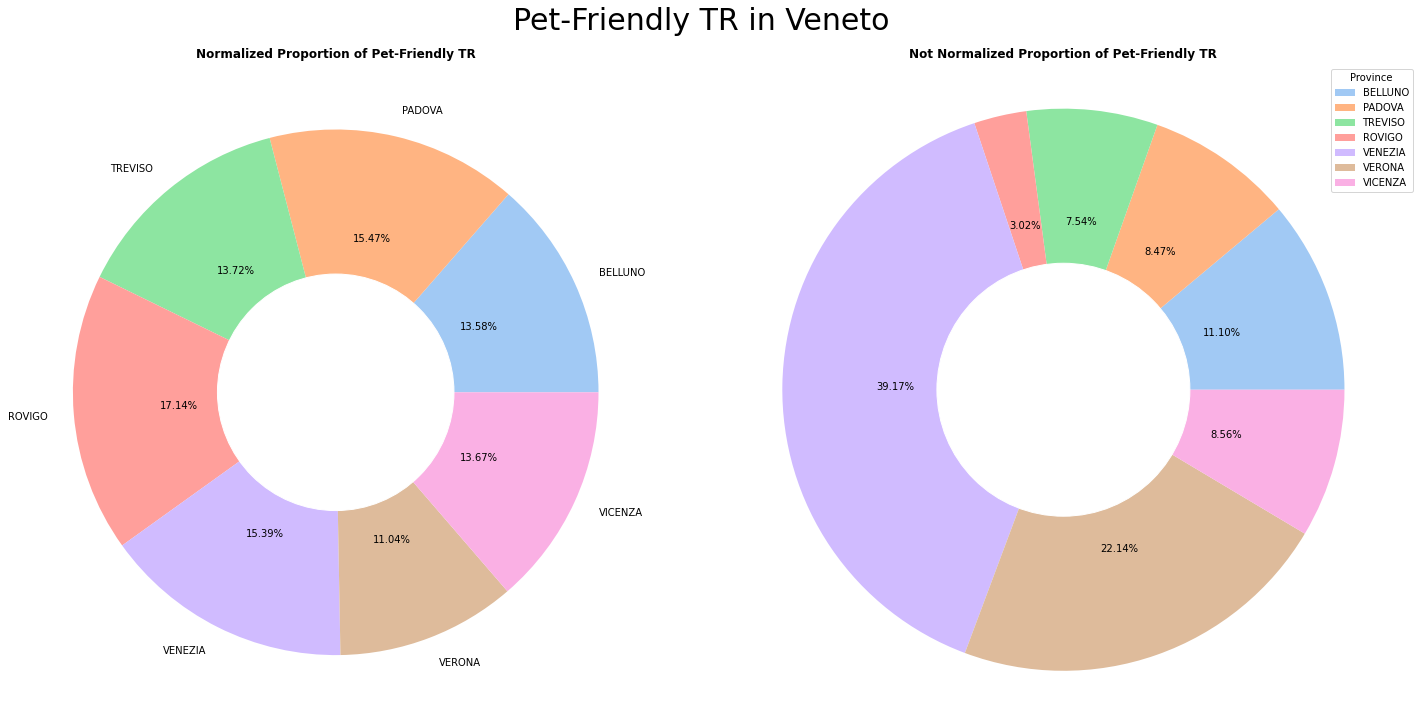

In [173]:
## ANIMAL FRIENDLY
## Definition of Animal Friendly:
## Animal friendly tourist residences are accommodations that are:
## designed and managed to be welcoming and accommodating to both human guests and their animal companions.
## This may include features such as designated pet-friendly rooms or areas, 
## easy access to outdoor spaces for exercise and relief, and possibly even on-site pet services such as grooming or boarding.

## animal friendly pie charts

from sklearn import preprocessing

## 1 normalizing the number of animal-friendly tr

belluno_af_tr = belluno_descriptive.loc['ANIMALI AMMESSI']
padova_af_tr = padova_descriptive.loc['ANIMALI AMMESSI']
treviso_af_tr = treviso_descriptive.loc['ANIMALI AMMESSI']
rovigo_af_tr = rovigo_descriptive.loc['ANIMALI AMMESSI']
venezia_af_tr = venezia_descriptive.loc['ANIMALI AMMESSI']
verona_af_tr = verona_descriptive.loc['ANIMALI AMMESSI']
vicenza_af_tr = vicenza_descriptive.loc['ANIMALI AMMESSI']

af_array_1 = np.array([belluno_af_tr/belluno_tr, padova_af_tr/padova_tr, treviso_af_tr/treviso_tr, rovigo_af_tr/rovigo_tr, venezia_af_tr/venezia_tr, verona_af_tr/verona_tr, vicenza_af_tr/vicenza_tr])
af_array_1.reshape(7,1)
normalized_arr_1 = np.array(preprocessing.normalize(af_array_1[np.newaxis]))

af_array_2 = np.array([belluno_af_tr, padova_af_tr, treviso_af_tr, rovigo_af_tr, venezia_af_tr, verona_af_tr, vicenza_af_tr])
af_array_2.reshape(7,1)
normalized_arr_2 = np.array(preprocessing.normalize(af_array_2[np.newaxis]))

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## change into 1 dimensional array
data_1 = normalized_arr_1.flatten()
data_2 = normalized_arr_2.flatten()

labels = province

axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of Pet-Friendly TR", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Not Normalized Proportion of Pet-Friendly TR", fontweight='bold')

fig.suptitle("Pet-Friendly TR in Veneto", fontsize=30)

plt.legend(labels, title='Province')
plt.axis('equal')
plt.show()

In [174]:
af_array_1.reshape(7,1)

array([[0.47636364],
       [0.54249548],
       [0.48108108],
       [0.6011236 ],
       [0.53968872],
       [0.38735178],
       [0.47943038]])

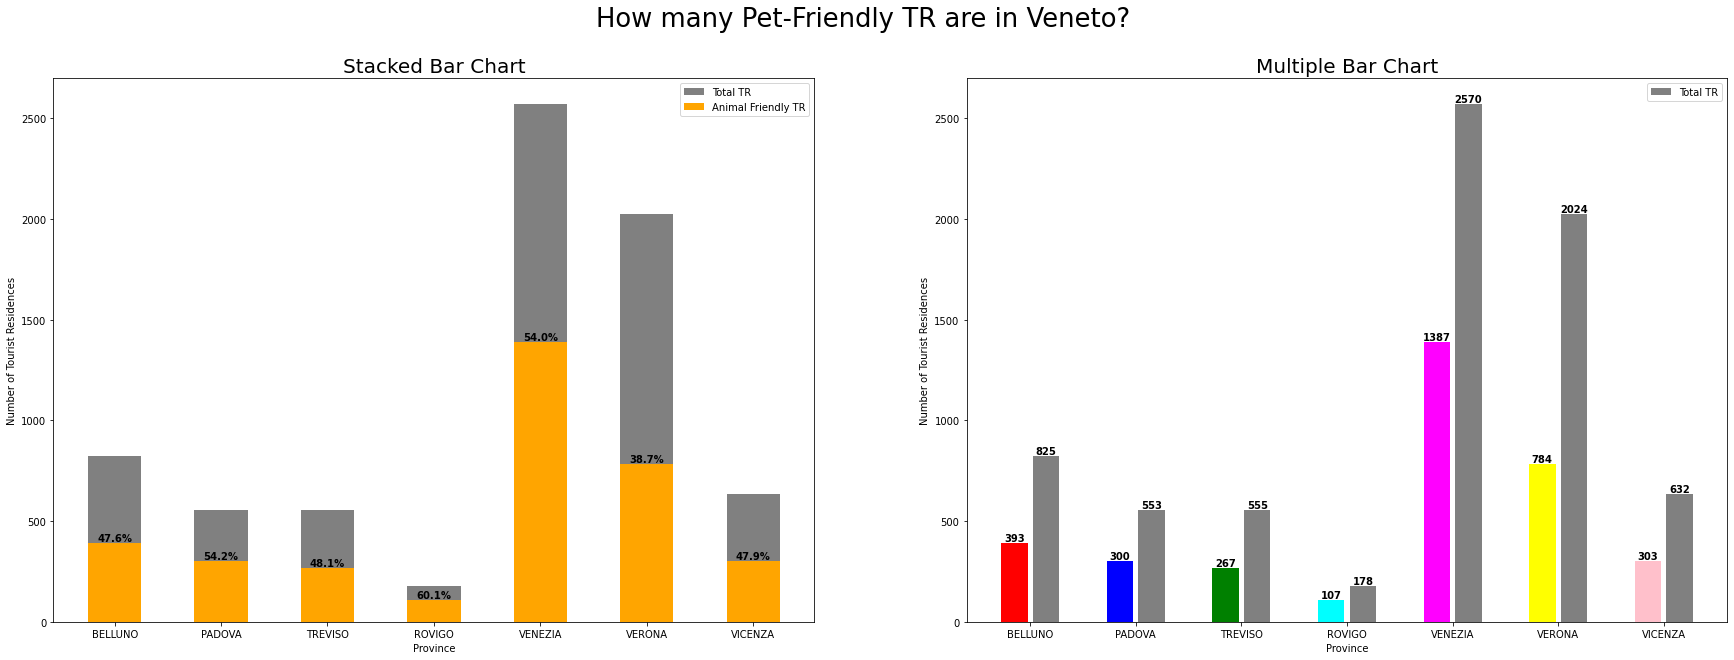

In [175]:
animal_friendly_list=[belluno_af_tr, padova_af_tr, treviso_af_tr, rovigo_af_tr, venezia_af_tr, verona_af_tr, vicenza_af_tr]

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many Pet-Friendly TR are in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Tourist Residences')

for i in range(len(animal_friendly_list)):
    axs[0].bar(province[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(province[i], animal_friendly_list[i], color='orange', width = 0.5, label='Animal Friendly TR')
    number=round((animal_friendly_list[i]/city_len[i])*100,1)
    axs[0].text(province[i], animal_friendly_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## 2nd bar chart ( multiple bar chart)

X=np.arange(7)

list_of_colors=[
'red',
'blue',
'green',
'cyan',
'magenta',
'yellow',
'pink']

data = [city_len, animal_friendly_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Tourist Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25, label='Total TR')
    number=round((animal_friendly_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')
    

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

## set the name of province in x axis
axs[1].set_xticks(X)
axs[1].set_xticklabels(province)

plt.show()


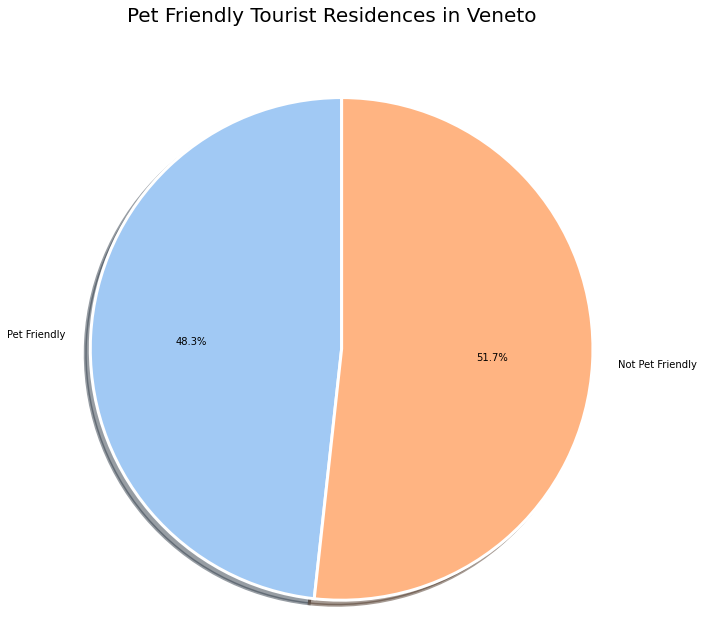

In [176]:
## How many tourist residences are pet friendly in Veneto?

sum_pf = np.sum(animal_friendly_list)
total_tr = np.sum(city_len)

## ratio of animal friendly tr in Veneto

ratio_af_tr = sum_pf/total_tr

## create a pie chart with the pf tourist residences and the not pf tourist residences in Veneto

labels = ['Pet Friendly', 'Not Pet Friendly']
sizes = [ratio_af_tr, 1 - ratio_af_tr]

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=palette)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.suptitle("Pet Friendly Tourist Residences in Veneto", fontsize=20)

plt.show()


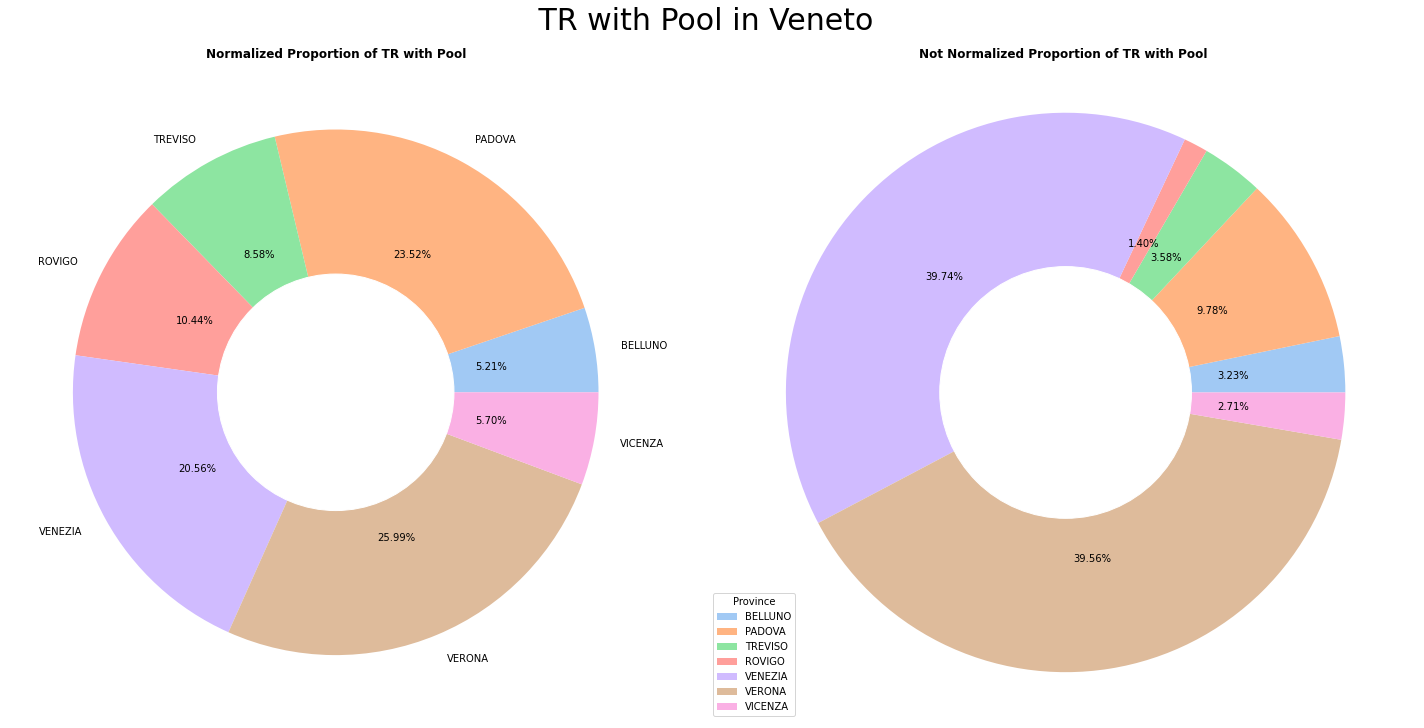

In [177]:
## POOL 
## Definition of Pool:
## Tourist residences with pool refers to accomodation that have a swimming pool on the property. 
## These types of properties are popular among tourists and vacationers who are looking for a place to stay that offers the convenience and luxury of having a pool to swim in during their stay. 

belluno_pool_tr = belluno_descriptive.loc['PISCINA']
padova_pool_tr = padova_descriptive.loc['PISCINA']
treviso_pool_tr = treviso_descriptive.loc['PISCINA']
rovigo_pool_tr = rovigo_descriptive.loc['PISCINA']
venezia_pool_tr = venezia_descriptive.loc['PISCINA']
verona_pool_tr = verona_descriptive.loc['PISCINA']
vicenza_pool_tr = vicenza_descriptive.loc['PISCINA']

## array with ratio of pool tr and total tr by provincia
pool_array_1 = np.array([belluno_pool_tr/belluno_tr, padova_pool_tr/padova_tr, treviso_pool_tr/treviso_tr, rovigo_pool_tr/rovigo_tr, venezia_pool_tr/venezia_tr, verona_pool_tr/verona_tr, vicenza_pool_tr/vicenza_tr])
normalized_arr_1 = preprocessing.normalize(pool_array_1[np.newaxis])

## array with number of pool by provincia
pool_array_2 = np.array([belluno_pool_tr, padova_pool_tr, treviso_pool_tr, rovigo_pool_tr, venezia_pool_tr, verona_pool_tr, vicenza_pool_tr])
normalized_arr_2 = preprocessing.normalize(pool_array_2[np.newaxis])

## create pie charts
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")


## normalizing tha array
## In this way i will have an array with normalized values for the two data
data_1 = (normalized_arr_1.T).flatten()
data_2 = (normalized_arr_2.T).flatten()

labels = province

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[0] --> this is the one in which I see the normalizet proportion of TR with Pool by provincia
axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of TR with Pool", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[1] --> this is the axs in which I see the normalized proportion of TR with Pool in Veneto (Total number of TR with Pool)
axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Not Normalized Proportion of TR with Pool", fontweight='bold')

fig.suptitle(" TR with Pool in Veneto", fontsize=30)

plt.legend(labels, title='Province')
plt.axis('equal')
plt.show()

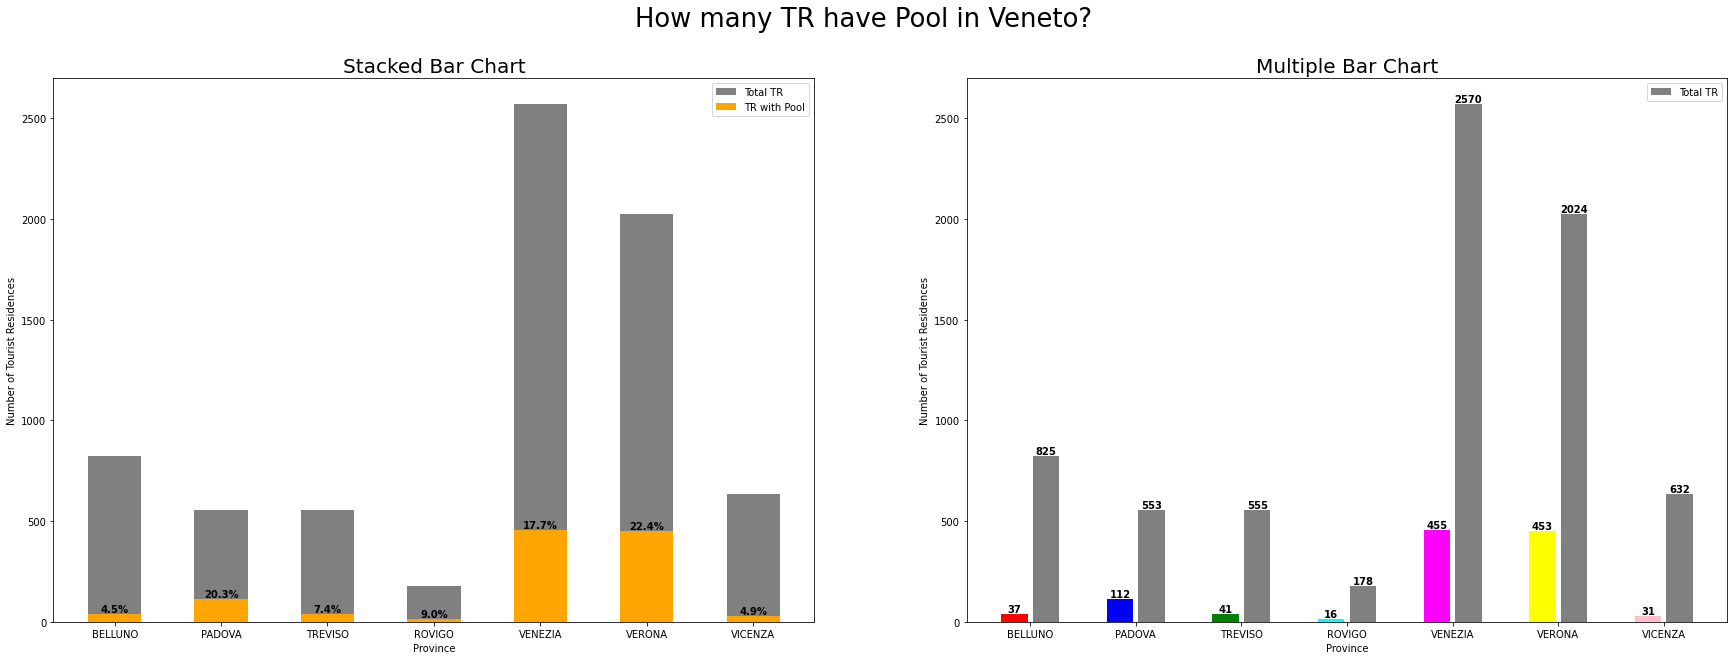

In [178]:
pool_list=[belluno_pool_tr, padova_pool_tr, treviso_pool_tr, rovigo_pool_tr, venezia_pool_tr, verona_pool_tr, vicenza_pool_tr]

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many TR have Pool in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Tourist Residences')

for i in range(len(pool_list)):
    axs[0].bar(province[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(province[i], pool_list[i], color='orange', width = 0.5, label='TR with Pool')
    number=round((pool_list[i]/city_len[i])*100,1)
    axs[0].text(province[i], pool_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## 2nd bar chart ( multiple bar chart)

X=np.arange(7)

data = [city_len, pool_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Tourist Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25, label='Total TR')
    number=round((pool_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')
    

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

## set the name of province in x axis
axs[1].set_xticks(X)
axs[1].set_xticklabels(province)

plt.show()

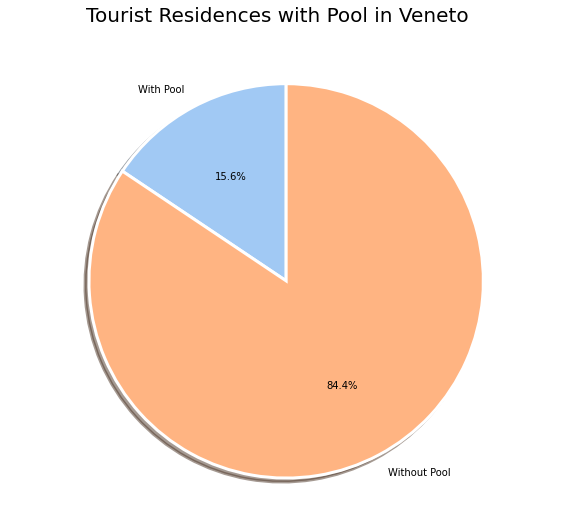

In [179]:
## How many tourist residences have Pool in Veneto?

sum_pool = np.sum(pool_list)
total_tr = np.sum(city_len)

## ratio of animal friendly tr in Veneto

ratio_pool_tr = sum_pool/total_tr

## create a pie chart with the pf tourist residences and the not pf tourist residences in Veneto

labels = ['With Pool', 'Without Pool']
sizes = [ratio_pool_tr, 1 - ratio_pool_tr]

fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=palette)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.suptitle("Tourist Residences with Pool in Veneto", fontsize=20)

plt.show()

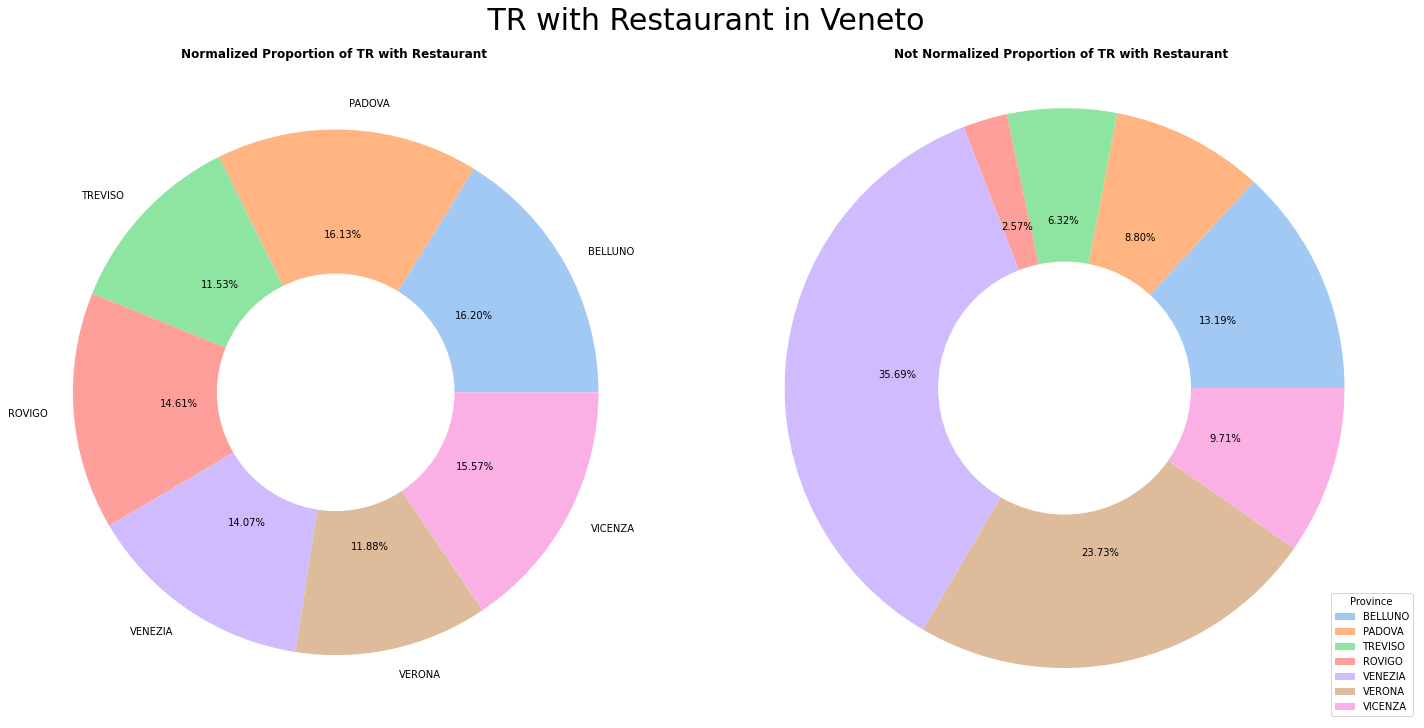

In [180]:
## RESTAURANT
## Definition of Restaurant:
## Tourist residences with a restaurant refers to accomodations that have an on-site restaurant. 
## These types of properties are popular among tourists and vacationers who are looking for a place to stay that offers the convenience of having a restaurant where they can enjoy meals during their stay.
## The restaurant can be a shared space, or a private space that is only accessible to guests staying in the residence.


belluno_rest_tr = belluno_descriptive.loc['RISTORANTE']
padova_rest_tr = padova_descriptive.loc['RISTORANTE']
treviso_rest_tr = treviso_descriptive.loc['RISTORANTE']
rovigo_rest_tr = rovigo_descriptive.loc['RISTORANTE']
venezia_rest_tr = venezia_descriptive.loc['RISTORANTE']
verona_rest_tr = verona_descriptive.loc['RISTORANTE']
vicenza_rest_tr = vicenza_descriptive.loc['RISTORANTE']

## array with ratio of pool tr and total tr by provincia
rest_array_1 = np.array([belluno_rest_tr/belluno_tr, padova_rest_tr/padova_tr, treviso_rest_tr/treviso_tr, rovigo_rest_tr/rovigo_tr, venezia_rest_tr/venezia_tr, verona_rest_tr/verona_tr, vicenza_rest_tr/vicenza_tr])
normalized_arr_1 = preprocessing.normalize(rest_array_1[np.newaxis])

## array with number of pool tr by provincia
rest_array_2 = np.array([belluno_rest_tr, padova_rest_tr, treviso_rest_tr, rovigo_rest_tr, venezia_rest_tr, verona_rest_tr, vicenza_rest_tr])
normalized_arr_2 = preprocessing.normalize(rest_array_2[np.newaxis])

## create pie charts
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")


## normalizing tha array
## In this way i will have an array with normalized values for the two data
data_1 = (normalized_arr_1.T).flatten()
data_2 = (normalized_arr_2.T).flatten()

labels = province

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[0] --> this is the one in which I see the normalizet proportion of TR with Pool by provincia
axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of TR with Restaurant ", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[1] --> this is the axs in which I see the normalized proportion of TR with Pool in Veneto (Total number of TR with Pool)
axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Not Normalized Proportion of TR with Restaurant ", fontweight='bold')

fig.suptitle(" TR with Restaurant in Veneto", fontsize=30)

plt.legend(labels, title='Province')
plt.axis('equal')
plt.show()

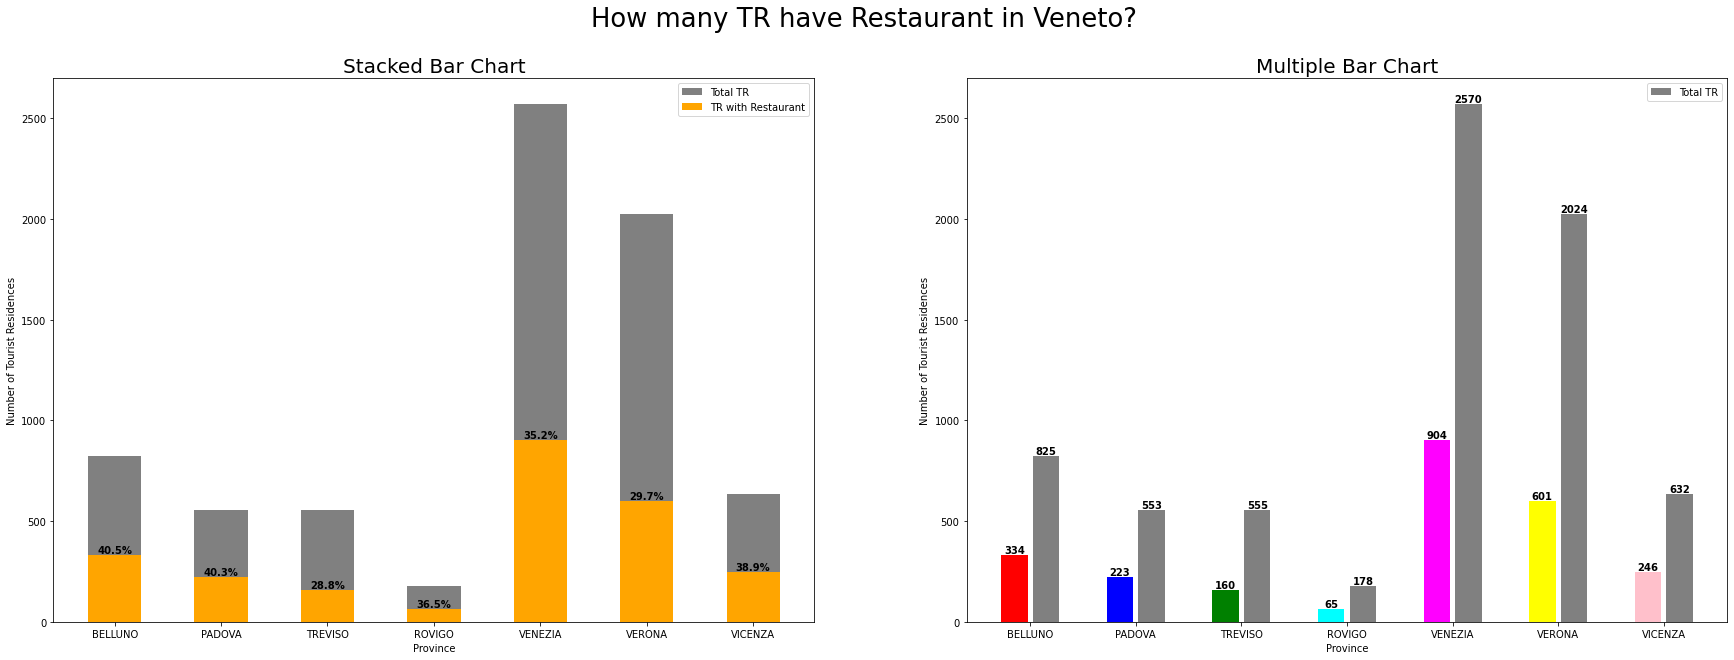

In [181]:
rest_list=[belluno_rest_tr, padova_rest_tr, treviso_rest_tr, rovigo_rest_tr, venezia_rest_tr, verona_rest_tr, vicenza_rest_tr]

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many TR have Restaurant in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Tourist Residences')

for i in range(len(rest_list)):
    axs[0].bar(province[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(province[i], rest_list[i], color='orange', width = 0.5, label='TR with Restaurant')
    number=round((rest_list[i]/city_len[i])*100,1)
    axs[0].text(province[i], rest_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## 2nd bar chart ( multiple bar chart)

X=np.arange(7)

data = [city_len, rest_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Tourist Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25, label='Total TR')
    number=round((rest_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')
    

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

## set the name of province in x axis
axs[1].set_xticks(X)
axs[1].set_xticklabels(province)

plt.show()

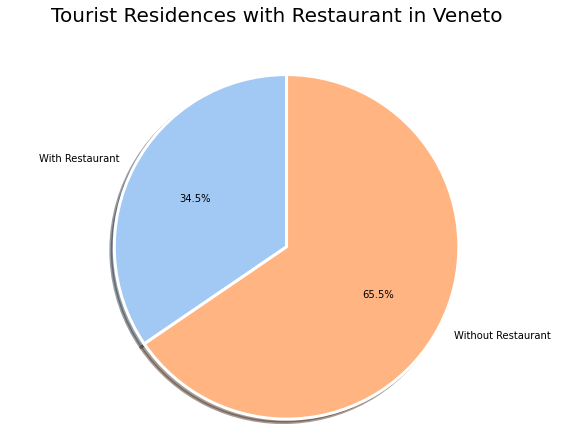

In [182]:
## How many tourist residences have Restaurant in Veneto?

sum_rest = np.sum(rest_list)
total_tr = np.sum(city_len)

## ratio of animal friendly tr in Veneto

ratio_rest_tr = sum_rest/total_tr

## create a pie chart with the pf tourist residences and the not pf tourist residences in Veneto

labels = ['With Restaurant', 'Without Restaurant']
sizes = [ratio_rest_tr, 1 - ratio_rest_tr]

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=palette)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.suptitle("Tourist Residences with Restaurant in Veneto", fontsize=20)

plt.show()

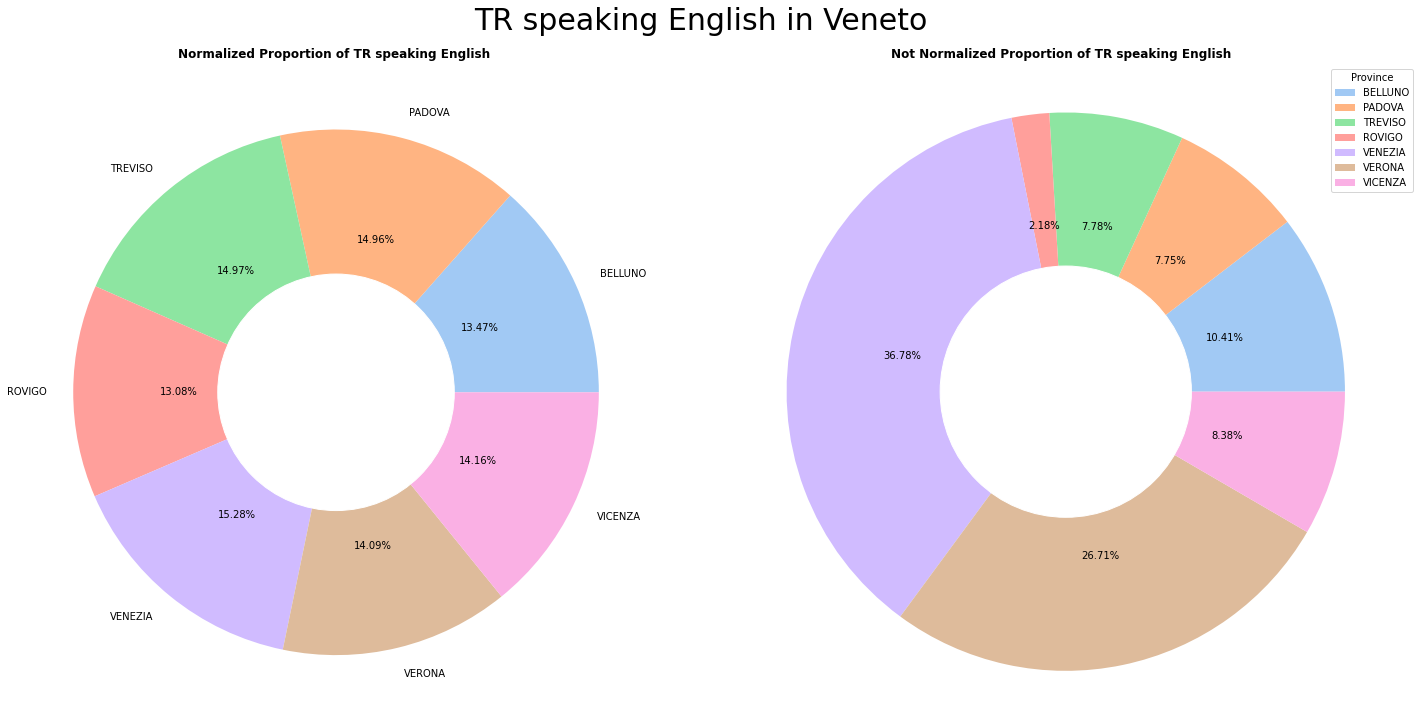

In [183]:
## ENGLISH 
## Definition of English:
## Tourist residences that speak English refer to accomodations where the staff or management can communicate effectively in English with the guests.
## These types of properties are popular among tourists and vacationers who primarily speak English and may not be fluent in the local language. 
## This can include properties where the front-desk staff, housekeeping, maintenance, and other staff members are able to speak and understand English, as well as properties where the majority of guests are English-speaking. 
## Some tourist residences may also provide written information or signage in English to help guests navigate their stay. 
## These type of tourist residences are a great option for travelers who are visiting a foreign country and want to feel comfortable and well-informed during their stay.

belluno_eng_tr = belluno_descriptive.loc['INGLESE']
padova_eng_tr = padova_descriptive.loc['INGLESE']
treviso_eng_tr = treviso_descriptive.loc['INGLESE']
rovigo_eng_tr = rovigo_descriptive.loc['INGLESE']
venezia_eng_tr = venezia_descriptive.loc['INGLESE']
verona_eng_tr = verona_descriptive.loc['INGLESE']
vicenza_eng_tr = vicenza_descriptive.loc['INGLESE']

## array with ratio of pool tr and total tr by provincia
eng_array_1 = np.array([belluno_eng_tr/belluno_tr, padova_eng_tr/padova_tr, treviso_eng_tr/treviso_tr, rovigo_eng_tr/rovigo_tr, venezia_eng_tr/venezia_tr, verona_eng_tr/verona_tr, vicenza_eng_tr/vicenza_tr])
normalized_arr_1 = preprocessing.normalize(eng_array_1[np.newaxis])

## array with number of pool by provincia
eng_array_2 = np.array([belluno_eng_tr, padova_eng_tr, treviso_eng_tr, rovigo_eng_tr, venezia_eng_tr, verona_eng_tr, vicenza_eng_tr])
normalized_arr_2 = preprocessing.normalize(eng_array_2[np.newaxis])

## create pie charts
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")


## normalizing tha array
## In this way i will have an array with normalized values for the two data
data_1 = (normalized_arr_1.T).flatten()
data_2 = (normalized_arr_2.T).flatten()

labels = province

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[0] --> this is the one in which I see the normalizet proportion of TR with Pool by provincia
axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of TR speaking English ", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[1] --> this is the axs in which I see the normalized proportion of TR with Pool in Veneto (Total number of TR with Pool)
axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Not Normalized Proportion of TR speaking English ", fontweight='bold')

fig.suptitle("TR speaking English in Veneto", fontsize=30)

plt.legend(labels, title='Province')
plt.axis('equal')
plt.show()


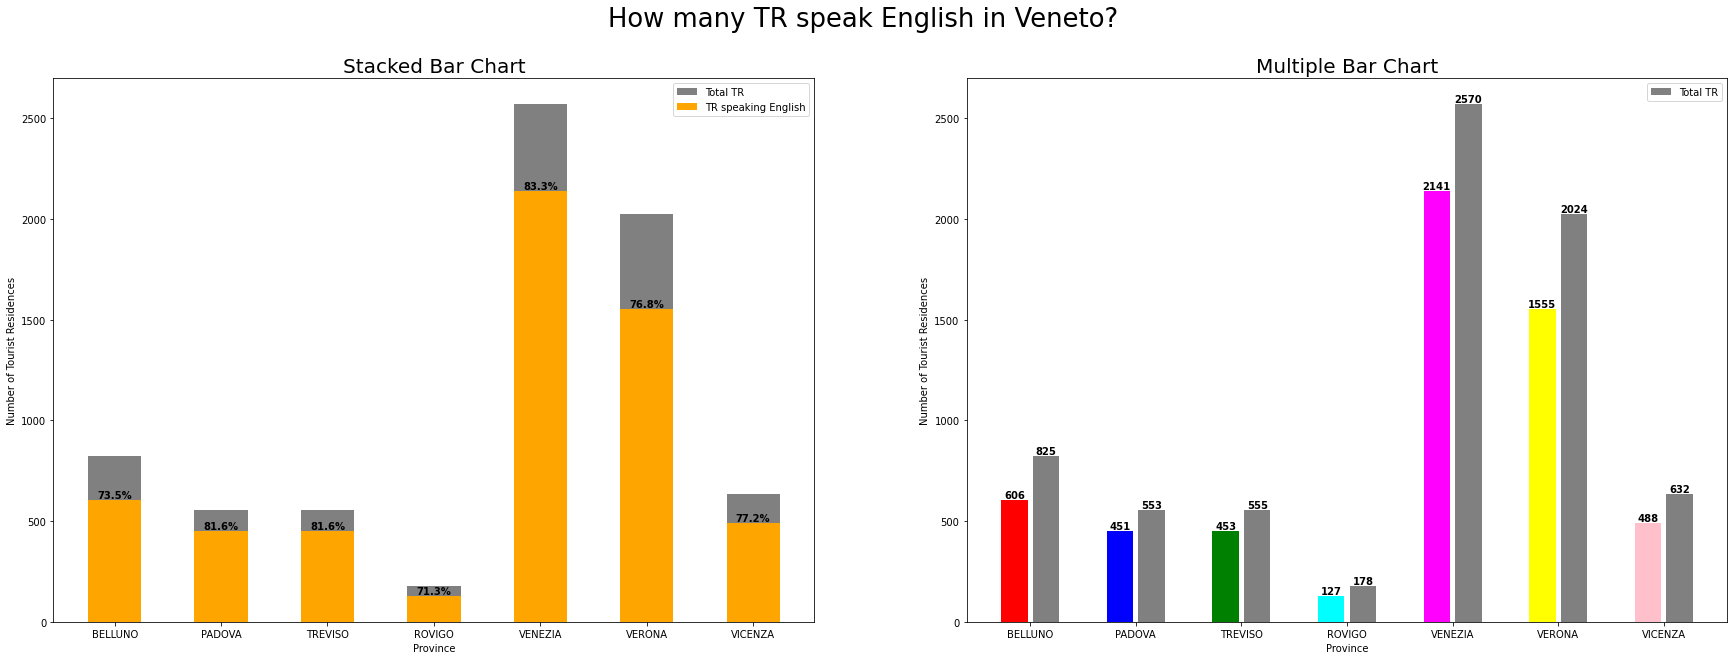

In [184]:
eng_list=[belluno_eng_tr, padova_eng_tr, treviso_eng_tr, rovigo_eng_tr, venezia_eng_tr, verona_eng_tr, vicenza_eng_tr]

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many TR speak English in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Tourist Residences')

for i in range(len(eng_list)):
    axs[0].bar(province[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(province[i], eng_list[i], color='orange', width = 0.5, label='TR speaking English')
    number=round((eng_list[i]/city_len[i])*100,1)
    axs[0].text(province[i], eng_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## 2nd bar chart ( multiple bar chart)

X=np.arange(7)

data = [city_len, eng_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Tourist Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25, label='Total TR')
    number=round((eng_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')
    

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

## set the name of province in x axis
axs[1].set_xticks(X)
axs[1].set_xticklabels(province)

plt.show()

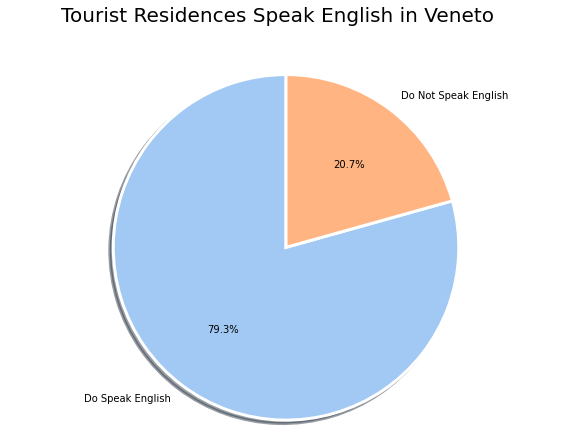

In [185]:
## How many tourist residences speak English in Veneto?

sum_eng = np.sum(eng_list)
total_tr = np.sum(city_len)

## ratio of animal friendly tr in Veneto

ratio_eng_tr = sum_eng/total_tr

## create a pie chart with the pf tourist residences and the not pf tourist residences in Veneto

labels = ['Do Speak English', 'Do Not Speak English']
sizes = [ratio_eng_tr, 1 - ratio_eng_tr]

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=palette)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.suptitle("Tourist Residences Speak English in Veneto", fontsize=20)

plt.show()

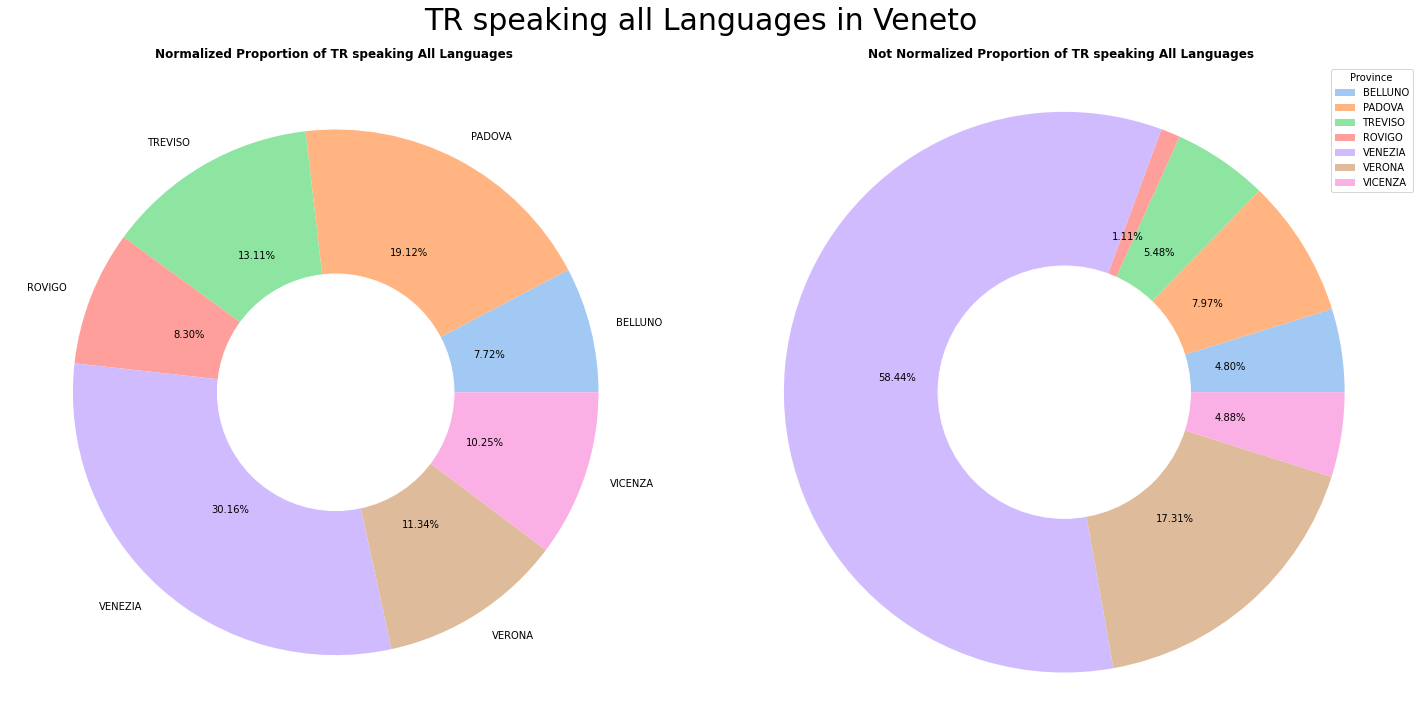

In [186]:
## ALL FOUR LANGUAGES (ENGLISH, SPANISH, GERMAN, FRENCH)
## Definition of 4 Languages
##Tourist residences that speak English, Spanish, German, French refer to accomodations where the staff or management can communicate effectively in multiple languages,
## including English, Spanish, German, and French with the guests. 

belluno_lan_tr = belluno_descriptive.loc['LANGUAGES']
padova_lan_tr = padova_descriptive.loc['LANGUAGES']
treviso_lan_tr = treviso_descriptive.loc['LANGUAGES']
rovigo_lan_tr = rovigo_descriptive.loc['LANGUAGES']
venezia_lan_tr = venezia_descriptive.loc['LANGUAGES']
verona_lan_tr = verona_descriptive.loc['LANGUAGES']
vicenza_lan_tr = vicenza_descriptive.loc['LANGUAGES']

## array with ratio of pool tr and total tr by provincia
lan_array_1 = np.array([belluno_lan_tr/belluno_tr, padova_lan_tr/padova_tr, treviso_lan_tr/treviso_tr, rovigo_lan_tr/rovigo_tr, venezia_lan_tr/venezia_tr, verona_lan_tr/verona_tr, vicenza_lan_tr/vicenza_tr])
normalized_arr_1 = preprocessing.normalize(lan_array_1[np.newaxis])

## array with number of pool tr by provincia
lan_array_2 = np.array([belluno_lan_tr, padova_lan_tr, treviso_lan_tr, rovigo_lan_tr, venezia_lan_tr, verona_lan_tr, vicenza_lan_tr])
normalized_arr_2 = preprocessing.normalize(lan_array_2[np.newaxis])

## create pie charts
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")


## normalizing tha array
## In this way i will have an array with normalized values for the two data
data_1 = (normalized_arr_1.T).flatten()
data_2 = (normalized_arr_2.T).flatten()

labels = province

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[0] --> this is the one in which I see the normalizet proportion of TR with Pool by provincia
axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of TR speaking All Languages ", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[1] --> this is the axs in which I see the normalized proportion of TR with Pool in Veneto (Total number of TR with Pool)
axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Not Normalized Proportion of TR speaking All Languages ", fontweight='bold')

fig.suptitle("TR speaking all Languages in Veneto", fontsize=30)

plt.legend(labels, title='Province')
plt.axis('equal')
plt.show()

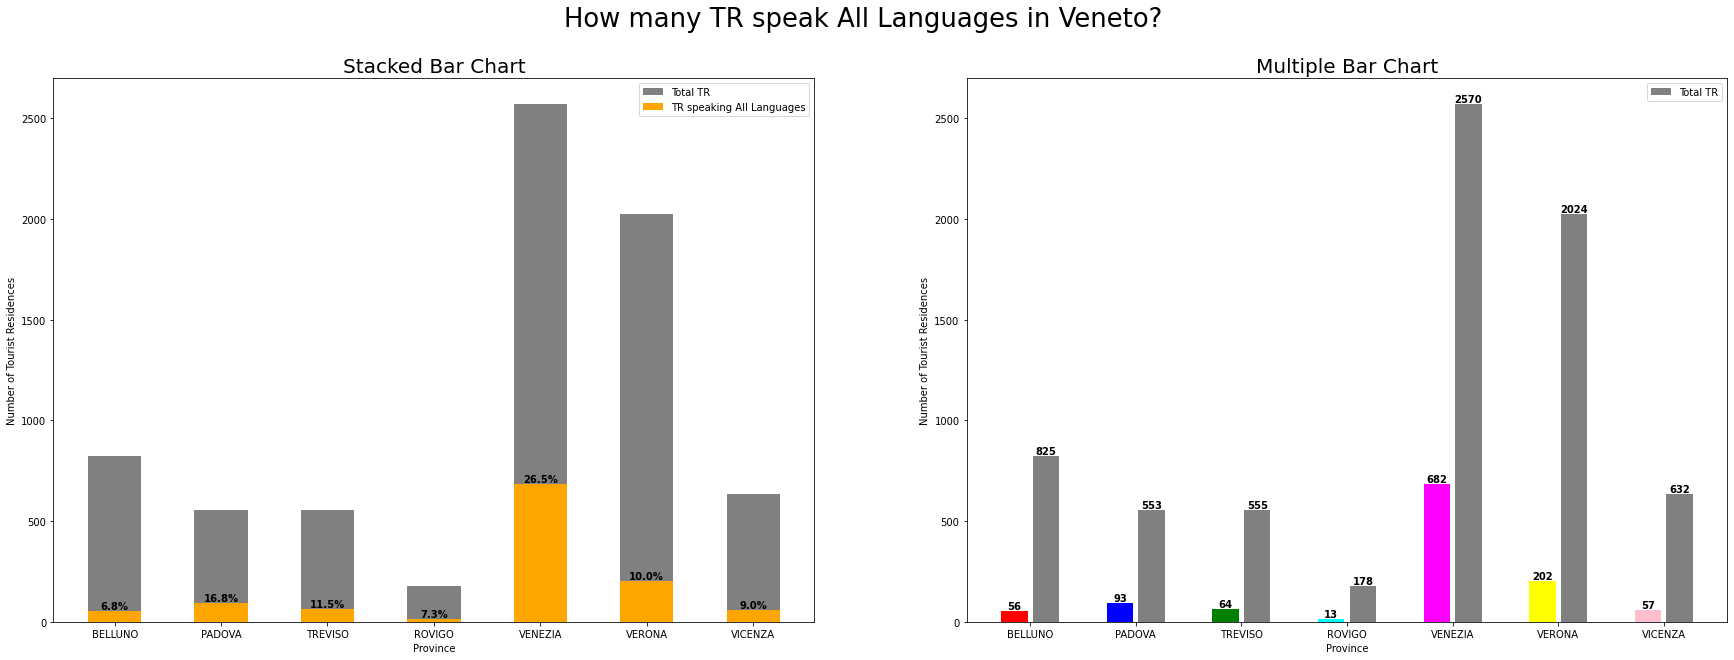

In [187]:
lan_list=[belluno_lan_tr, padova_lan_tr, treviso_lan_tr, rovigo_lan_tr, venezia_lan_tr, verona_lan_tr, vicenza_lan_tr]

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many TR speak All Languages in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Tourist Residences')

for i in range(len(lan_list)):
    axs[0].bar(province[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(province[i], lan_list[i], color='orange', width = 0.5, label='TR speaking All Languages')
    number=round((lan_list[i]/city_len[i])*100,1)
    axs[0].text(province[i], lan_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## 2nd bar chart ( multiple bar chart)

X=np.arange(7)

data = [city_len, lan_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Tourist Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25, label='Total TR')
    number=round((lan_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')
    

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

## set the name of province in x axis
axs[1].set_xticks(X)
axs[1].set_xticklabels(province)

plt.show()

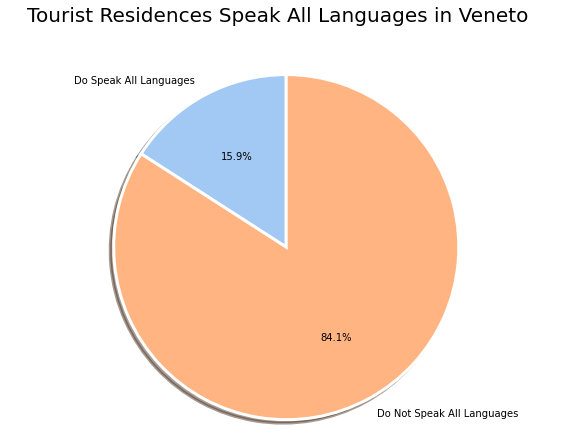

In [188]:
## How many tourist residences speak All Languages in Veneto?

sum_lan = np.sum(lan_list)
total_tr = np.sum(city_len)

## ratio of animal friendly tr in Veneto

ratio_lan_tr = sum_lan/total_tr

## create a pie chart with the pf tourist residences and the not pf tourist residences in Veneto

labels = ['Do Speak All Languages', 'Do Not Speak All Languages']
sizes = [ratio_lan_tr, 1 - ratio_lan_tr]

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=palette)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.suptitle("Tourist Residences Speak All Languages in Veneto", fontsize=20)

plt.show()

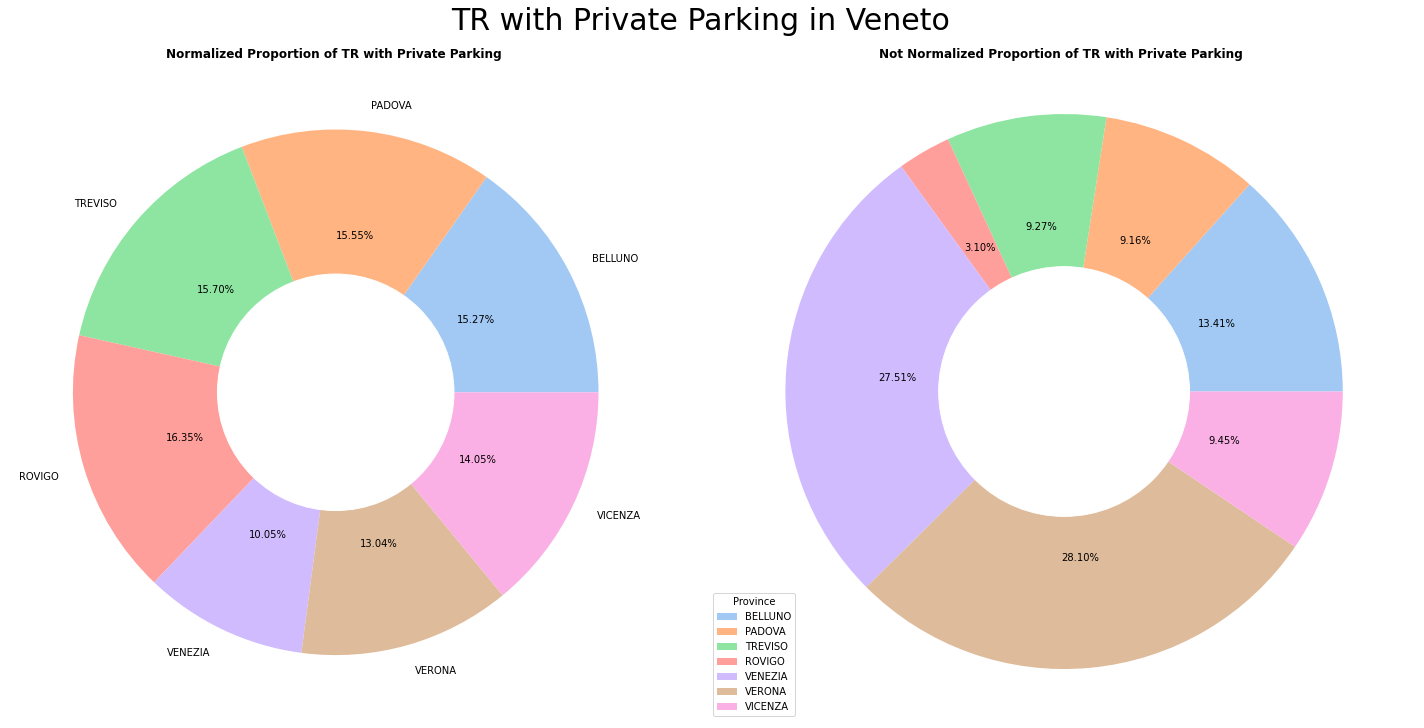

In [189]:
## Parking
## Tourist residences with private parking are accomodations that provide private parking spaces for guests.
## The private parking is a convenience for guests who have rented a vehicle or brought their own, as it provides a secure and convenient place to park.

belluno_park_tr = belluno_descriptive.loc['PARCHEGGIO']
padova_park_tr = padova_descriptive.loc['PARCHEGGIO']
treviso_park_tr = treviso_descriptive.loc['PARCHEGGIO']
rovigo_park_tr = rovigo_descriptive.loc['PARCHEGGIO']
venezia_park_tr = venezia_descriptive.loc['PARCHEGGIO']
verona_park_tr = verona_descriptive.loc['PARCHEGGIO']
vicenza_park_tr = vicenza_descriptive.loc['PARCHEGGIO']

## array with ratio of pool tr and total tr by provincia
park_array_1 = np.array([belluno_park_tr/belluno_tr, padova_park_tr/padova_tr, treviso_park_tr/treviso_tr, rovigo_park_tr/rovigo_tr, venezia_park_tr/venezia_tr, verona_park_tr/verona_tr, vicenza_park_tr/vicenza_tr])
normalized_arr_1 = preprocessing.normalize(park_array_1[np.newaxis])

## array with number of pool tr by provincia
park_array_2 = np.array([belluno_park_tr, padova_park_tr, treviso_park_tr, rovigo_park_tr, venezia_park_tr, verona_park_tr, vicenza_park_tr])
normalized_arr_2 = preprocessing.normalize(park_array_2[np.newaxis])

## create pie charts
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")


## normalizing tha array
## In this way i will have an array with normalized values for the two data
data_1 = (normalized_arr_1.T).flatten()
data_2 = (normalized_arr_2.T).flatten()

labels = province

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[0] --> this is the one in which I see the normalizet proportion of TR with Pool by provincia
axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of TR with Private Parking ", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[1] --> this is the axs in which I see the normalized proportion of TR with Pool in Veneto (Total number of TR with Pool)
axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Not Normalized Proportion of TR with Private Parking ", fontweight='bold')

fig.suptitle("TR with Private Parking in Veneto", fontsize=30)

plt.legend(labels, title='Province')
plt.axis('equal')
plt.show()

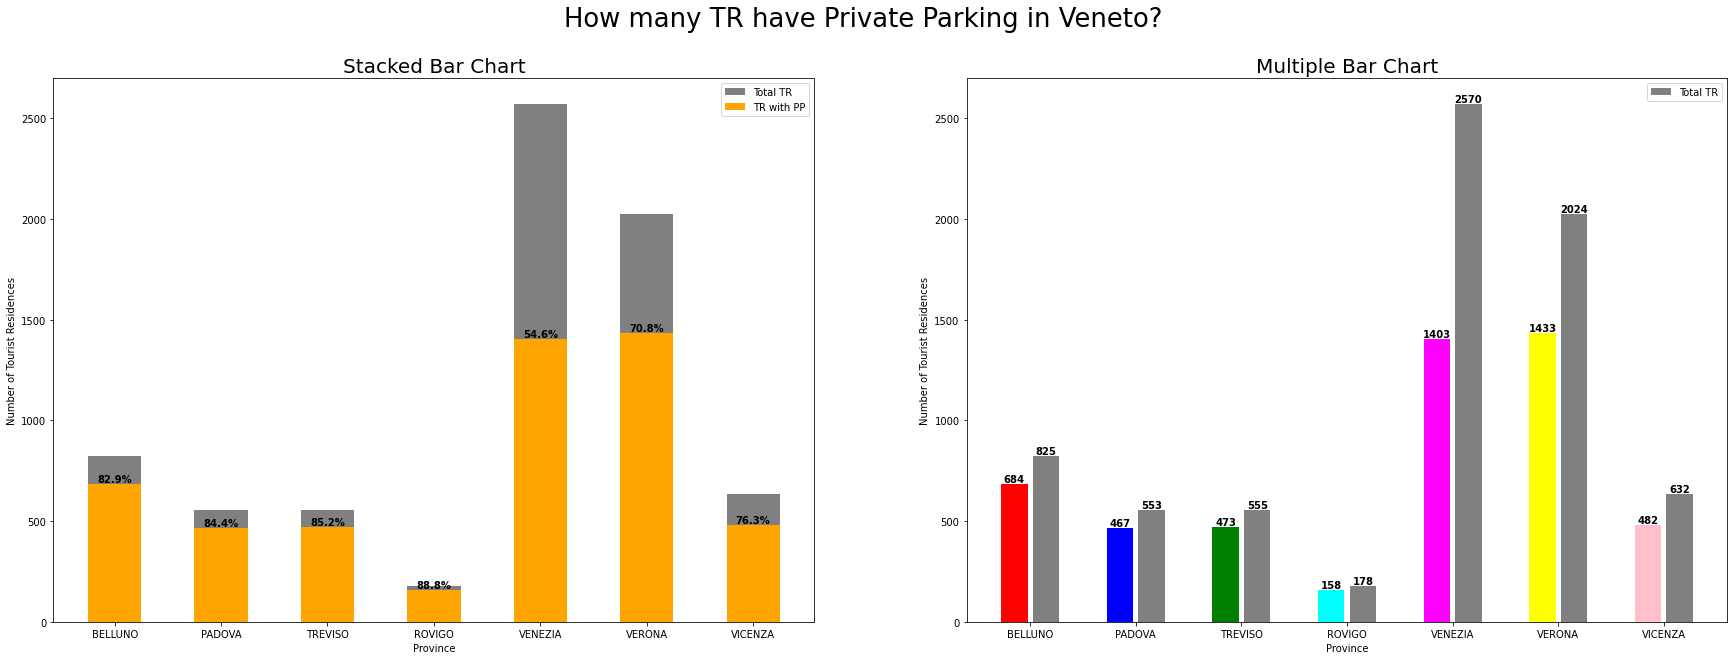

In [190]:
park_list=[belluno_park_tr, padova_park_tr, treviso_park_tr, rovigo_park_tr, venezia_park_tr, verona_park_tr, vicenza_park_tr]

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many TR have Private Parking in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Tourist Residences')

for i in range(len(park_list)):
    axs[0].bar(province[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(province[i], park_list[i], color='orange', width = 0.5, label='TR with PP')
    number=round((park_list[i]/city_len[i])*100,1)
    axs[0].text(province[i], park_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## 2nd bar chart ( multiple bar chart)

X=np.arange(7)

data = [city_len, park_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Tourist Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25, label='Total TR')
    number=round((park_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')
    

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

## set the name of province in x axis
axs[1].set_xticks(X)
axs[1].set_xticklabels(province)

plt.show()

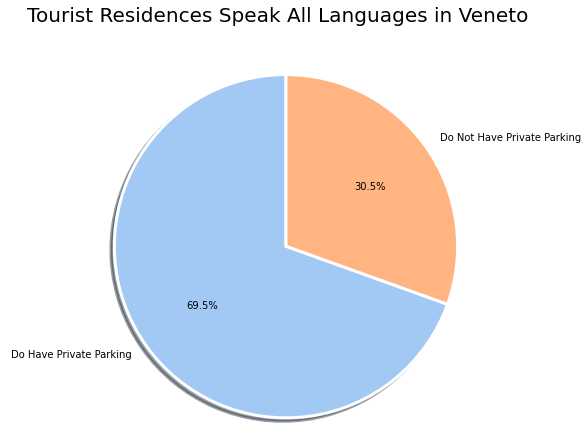

In [191]:
## How many tourist residences have Private Parking in Veneto?

sum_park = np.sum(park_list)
total_tr = np.sum(city_len)

## ratio of animal friendly tr in Veneto

ratio_park_tr = sum_park/total_tr

## create a pie chart with the pf tourist residences and the not pf tourist residences in Veneto

labels = ['Do Have Private Parking', 'Do Not Have Private Parking']
sizes = [ratio_park_tr, 1 - ratio_park_tr]

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=palette)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.suptitle("Tourist Residences Speak All Languages in Veneto", fontsize=20)

plt.show()

In [192]:
## under 3, over 3, over 4 TR

tourism_structures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8504 entries, 0 to 8503
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROVINCIA              8504 non-null   object 
 1   COMUNE                 8504 non-null   object 
 2   LOCALITA               1573 non-null   object 
 3   TIPOLOGIA              8504 non-null   object 
 4   TIPOLOGIA SECONDARIA   3695 non-null   object 
 5   DENOMINAZIONE          8504 non-null   object 
 6   INDIRIZZO              8486 non-null   object 
 7   NUMERO CIVICO          8162 non-null   object 
 8   INTERNO                289 non-null    object 
 9   CAP                    8471 non-null   float64
 10  TELEFONO               8415 non-null   object 
 11  FAX                    5010 non-null   object 
 12  EMAIL                  8473 non-null   object 
 13  SITO WEB               5725 non-null   object 
 14  ZONA                   8504 non-null   object 
 15  PISC

In [193]:
tourism_df_to_drop = tourism_structures_df.copy()

In [194]:
tourism_df_ok = tourism_df_to_drop.drop(tourism_df_to_drop.columns[[2,4,6,7,8,9,10,11,12,13,14,16,19,20,21,23,26,27,28,29,30,31,32,33,34,35,36,42,43]], axis=1)

In [195]:
## Now I have an array with the analyzed characteristics 
tourism_df_ok

,PROVINCIA,COMUNE,TIPOLOGIA,DENOMINAZIONE,PISCINA,RISTORANTE,PARCHEGGIO,SAUNA,FITNESS,ANIMALI AMMESSI,INGLESE,FRANCESE,TEDESCO,SPAGNOLO,CHIUSURA TEMPORANEA,CLASSIFICAZIONE
0,BELLUNO,AGORDO,AGRITURISMO,CASA BIANCA DI CHIERZI SANTINA,0,0,0,0,0,0,0,0,0,0,0,NaN
1,BELLUNO,AGORDO,ALBERGO,ERICE,0,1,1,0,0,0,1,0,1,0,0,3 ***
2,BELLUNO,AGORDO,ALBERGO,PENSIONE DUE ANGELI,0,1,0,0,0,0,1,0,0,0,0,1 *
3,BELLUNO,AGORDO,ALBERGO,VILLA IMPERINA,0,1,1,1,1,1,1,1,1,1,0,3 ***
4,BELLUNO,AGORDO,BED AND BREAKFAST,B&B VILLA BELVEDERE - (temp. chiusa),0,0,1,0,0,1,1,0,0,0,1,4 Leoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8499,VICENZA,ZUGLIANO,AGRITURISMO,BORGHETTO SAN BIAGIO,0,0,0,0,0,0,0,0,0,0,0,NaN
8500,VICENZA,ZUGLIANO,AGRITURISMO,MARINEA,0,0,0,0,0,0,0,0,0,0,0,NaN
8501,VICENZA,ZUGLIANO,ALBERGO,CUNICO,0,0,0,0,0,1,1,0,0,0,0,1 *
8502,VICENZA,ZUGLIANO,BED AND BREAKFAST,B&B DALLA COSTA EDWARD,0,0,0,0,0,0,0,0,0,0,0,2 Leoni


In [196]:
## check the infos
tourism_df_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8504 entries, 0 to 8503
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PROVINCIA             8504 non-null   object
 1   COMUNE                8504 non-null   object
 2   TIPOLOGIA             8504 non-null   object
 3   DENOMINAZIONE         8504 non-null   object
 4   PISCINA               8504 non-null   int64 
 5   RISTORANTE            8504 non-null   int64 
 6   PARCHEGGIO            8504 non-null   int64 
 7   SAUNA                 8504 non-null   int64 
 8   FITNESS               8504 non-null   int64 
 9   ANIMALI AMMESSI       8504 non-null   int64 
 10  INGLESE               8504 non-null   int64 
 11  FRANCESE              8504 non-null   int64 
 12  TEDESCO               8504 non-null   int64 
 13  SPAGNOLO              8504 non-null   int64 
 14  CHIUSURA TEMPORANEA   8504 non-null   int64 
 15  CLASSIFICAZIONE       7337 non-null   

In [197]:
## drop the Nan in classification column
nan_mask = tourism_df_ok['CLASSIFICAZIONE'].isnull()
tr_ok_clear_class_df = tourism_df_ok[nan_mask == False]

tr_ok_clear_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7337 entries, 1 to 8503
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PROVINCIA             7337 non-null   object
 1   COMUNE                7337 non-null   object
 2   TIPOLOGIA             7337 non-null   object
 3   DENOMINAZIONE         7337 non-null   object
 4   PISCINA               7337 non-null   int64 
 5   RISTORANTE            7337 non-null   int64 
 6   PARCHEGGIO            7337 non-null   int64 
 7   SAUNA                 7337 non-null   int64 
 8   FITNESS               7337 non-null   int64 
 9   ANIMALI AMMESSI       7337 non-null   int64 
 10  INGLESE               7337 non-null   int64 
 11  FRANCESE              7337 non-null   int64 
 12  TEDESCO               7337 non-null   int64 
 13  SPAGNOLO              7337 non-null   int64 
 14  CHIUSURA TEMPORANEA   7337 non-null   int64 
 15  CLASSIFICAZIONE       7337 non-null   

In [198]:
tr_ok_clear_class_df['CLASSIFICAZIONE'].unique()

array(['3 ***', '1 *', '4 Leoni', '2 Leoni', '3 Leoni', '2 **', '4 ****',
       '3 *** SUPERIOR', '5 Leoni', '4 **** SUPERIOR', '5 ***** lusso',
       '5 *****'], dtype=object)

In [199]:
## new indexes for the dataframe

new_indexes = []

for i in range(len(tr_ok_clear_class_df)):
  new_indexes.append(i)

tr_ok_clear_class_df.index = new_indexes

In [200]:
## change classification data, from string to int

for i in range(len(tr_ok_clear_class_df)):
  if tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '1 *':
    tr_ok_clear_class_df.loc[i, 'CLASSIFICAZIONE'] = int(1)
  elif tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '2 **' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '2 Leoni':
    tr_ok_clear_class_df.loc[i, 'CLASSIFICAZIONE'] = int(2)
  elif tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '3 ***' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '3 Leoni' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '3 *** SUPERIOR':
    tr_ok_clear_class_df.loc[i, 'CLASSIFICAZIONE'] = int(3)
  elif tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '4 ****' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '4 Leoni' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '4 **** SUPERIOR':
    tr_ok_clear_class_df.loc[i, 'CLASSIFICAZIONE'] = int(4)
  elif tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '5 *****' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '5 Leoni' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '5 ***** lusso':
    tr_ok_clear_class_df.loc[i, 'CLASSIFICAZIONE'] = int(5)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [201]:
## verify 
tr_ok_clear_class_df['CLASSIFICAZIONE'].unique()

array([3, 1, 4, 2, 5], dtype=object)

In [202]:
under_3_class = []

for i in range(len(tr_ok_clear_class_df)):
  if tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 1 or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 2 :
    under_3_class.append(int(1))
  else:
    under_3_class.append(int(0))

class_3_4_5 = []

for i in range(len(tr_ok_clear_class_df)):
  if tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 3 or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 4 or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 5 :
    class_3_4_5.append(int(1))
  else:
    class_3_4_5.append(int(0))

class_4_5 = []

for i in range(len(tr_ok_clear_class_df)):
  if tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 4 or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 5 :
    class_4_5.append(int(1))
  else:
    class_4_5.append(int(0))

class_5 = []

for i in range(len(tr_ok_clear_class_df)):
  if tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 5 :
    class_5.append(int(1))
  else:
    class_5.append(int(0))


tr_ok_clear_class_df['UNDER 3'] = under_3_class
tr_ok_clear_class_df['G.E 3'] = class_3
tr_ok_clear_class_df['G.E. 4'] = class_4
tr_ok_clear_class_df['CLASS 5'] = class_5

<ipython-input-202-f7a7b61c76f3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_ok_clear_class_df['UNDER 3'] = under_3_class
<ipython-input-202-f7a7b61c76f3>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_ok_clear_class_df['G.E 3'] = class_3
<ipython-input-202-f7a7b61c76f3>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [203]:
tr_df = tr_ok_clear_class_df

tr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7337 entries, 0 to 7336
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PROVINCIA             7337 non-null   object
 1   COMUNE                7337 non-null   object
 2   TIPOLOGIA             7337 non-null   object
 3   DENOMINAZIONE         7337 non-null   object
 4   PISCINA               7337 non-null   int64 
 5   RISTORANTE            7337 non-null   int64 
 6   PARCHEGGIO            7337 non-null   int64 
 7   SAUNA                 7337 non-null   int64 
 8   FITNESS               7337 non-null   int64 
 9   ANIMALI AMMESSI       7337 non-null   int64 
 10  INGLESE               7337 non-null   int64 
 11  FRANCESE              7337 non-null   int64 
 12  TEDESCO               7337 non-null   int64 
 13  SPAGNOLO              7337 non-null   int64 
 14  CHIUSURA TEMPORANEA   7337 non-null   int64 
 15  CLASSIFICAZIONE       7337 non-null   

In [204]:
## greate a groupby mean and sum by PROVINCIA

tr_groupby_mean = tr_df.groupby(['PROVINCIA']).mean()

tr_groupby_sum = tr_df.groupby(['PROVINCIA']).sum()

In [205]:
tr_groupby_mean.T

PROVINCIA,BELLUNO,PADOVA,ROVIGO,TREVISO,VENEZIA,VERONA,VICENZA
PISCINA,0.044848,0.202532,0.089888,0.073874,0.177043,0.223814,0.049051
RISTORANTE,0.404848,0.403255,0.365169,0.288288,0.351751,0.296937,0.389241
PARCHEGGIO,0.829091,0.844485,0.887640,0.852252,0.545914,0.708004,0.762658
SAUNA,0.181818,0.166365,0.016854,0.055856,0.042023,0.057806,0.060127
FITNESS,0.058182,0.166365,0.044944,0.045045,0.060311,0.057806,0.042722
ANIMALI AMMESSI,0.476364,0.542495,0.601124,0.481081,0.539689,0.387352,0.479430
INGLESE,0.734545,0.815552,0.713483,0.816216,0.833074,0.768281,0.772152
FRANCESE,0.358788,0.594937,0.477528,0.491892,0.624514,0.386364,0.403481
TEDESCO,0.513939,0.379747,0.280899,0.327928,0.570428,0.531621,0.231013
SPAGNOLO,0.151515,0.283906,0.134831,0.266667,0.400778,0.200099,0.200949


In [206]:
## classification data by provincia

tr_class = tr_groupby_mean.drop(columns=['PISCINA','RISTORANTE','PARCHEGGIO','SAUNA','FITNESS','ANIMALI AMMESSI','INGLESE','FRANCESE','TEDESCO','SPAGNOLO','CHIUSURA TEMPORANEA '])
tr_class


,UNDER 3,G.E 3,G.E. 4,CLASS 5
PROVINCIA,,,,
BELLUNO,0.463030,0.255758,0.047273,0.015758
PADOVA,0.332731,0.169982,0.122966,0.047016
ROVIGO,0.359551,0.213483,0.044944,0.011236
TREVISO,0.414414,0.118919,0.066667,0.039640
VENEZIA,0.345914,0.231907,0.086770,0.030350
VERONA,0.480731,0.160079,0.062747,0.020751
VICENZA,0.479430,0.131329,0.045886,0.006329


In [207]:
tr_groupby_sum.T

PROVINCIA,BELLUNO,PADOVA,ROVIGO,TREVISO,VENEZIA,VERONA,VICENZA
PISCINA,37,112,16,41,455,453,31
RISTORANTE,334,223,65,160,904,601,246
PARCHEGGIO,684,467,158,473,1403,1433,482
SAUNA,150,92,3,31,108,117,38
FITNESS,48,92,8,25,155,117,27
ANIMALI AMMESSI,393,300,107,267,1387,784,303
INGLESE,606,451,127,453,2141,1555,488
FRANCESE,296,329,85,273,1605,782,255
TEDESCO,424,210,50,182,1466,1076,146
SPAGNOLO,125,157,24,148,1030,405,127


In [208]:
tr_class_sum = tr_groupby_sum.drop(columns=['PISCINA','RISTORANTE','PARCHEGGIO','SAUNA','FITNESS','ANIMALI AMMESSI','INGLESE','FRANCESE','TEDESCO','SPAGNOLO','CHIUSURA TEMPORANEA '])
tr_class_sum

,UNDER 3,G.E 3,G.E. 4,CLASS 5
PROVINCIA,,,,
BELLUNO,382,211,39,13
PADOVA,184,94,68,26
ROVIGO,64,38,8,2
TREVISO,230,66,37,22
VENEZIA,889,596,223,78
VERONA,973,324,127,42
VICENZA,303,83,29,4


In [209]:
## dividing province mean

belluno_class_mean = tr_class.loc['BELLUNO']
padova_class_mean = tr_class.loc['PADOVA']
rovigo_class_mean = tr_class.loc['ROVIGO']
treviso_class_mean = tr_class.loc['TREVISO']
venezia_class_mean = tr_class.loc['VENEZIA']
verona_class_mean = tr_class.loc['VERONA']
vicenza_class_mean = tr_class.loc['VICENZA']

## dividing province sum

belluno_class_sum = tr_class_sum.loc['BELLUNO']
padova_class_sum = tr_class_sum.loc['PADOVA']
rovigo_class_sum = tr_class_sum.loc['ROVIGO']
treviso_class_sum = tr_class_sum.loc['TREVISO']
venezia_class_sum = tr_class_sum.loc['VENEZIA']
verona_class_sum = tr_class_sum.loc['VERONA']
vicenza_class_sum = tr_class_sum.loc['VICENZA']


select_cityverona


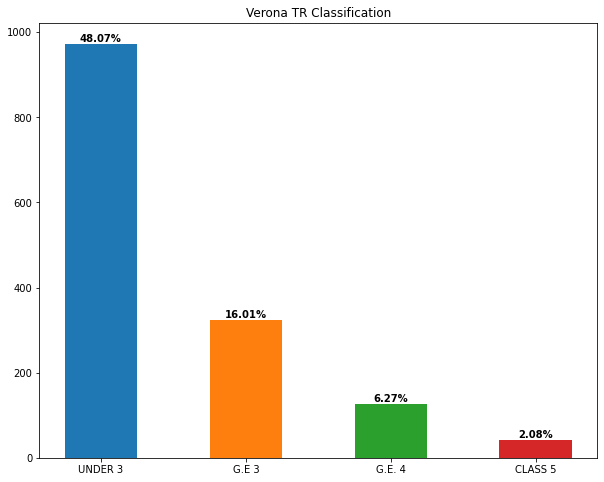

In [210]:
## Plotting the different classification TR

city= input('select_city').upper()

if city == 'BELLUNO':
  plt.figure(figsize=(10,8))
  plt.title('Belluno TR Classification')
  for i in range(len(belluno_class_mean)):
    plt.bar(belluno_class_mean.index[i], belluno_class_sum[i], width= 0.5)
    plt.text(belluno_class_mean.index[i],belluno_class_sum[i], str(round((belluno_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

elif city == 'PADOVA':
  plt.figure(figsize=(10,8))
  plt.title('Padova TR Classification')
  for i in range(len(padova_class_mean)):
    plt.bar(padova_class_mean.index[i], padova_class_sum[i], width= 0.5)
    plt.text(padova_class_mean.index[i],padova_class_sum[i], str(round((padova_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

elif city == 'ROVIGO':
  plt.figure(figsize=(10,8))
  plt.title('Rovigo TR Classification')
  for i in range(len(rovigo_class_mean)):
    plt.bar(rovigo_class_mean.index[i], rovigo_class_sum[i], width= 0.5)
    plt.text(rovigo_class_mean.index[i],rovigo_class_sum[i], str(round((rovigo_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

elif city == 'TREVISO':
  plt.figure(figsize=(10,8))
  plt.title('Treviso TR Classification')
  for i in range(len(treviso_class_mean)):
    plt.bar(treviso_class_mean.index[i], treviso_class_sum[i], width= 0.5)
    plt.text(treviso_class_mean.index[i],treviso_class_sum[i], str(round((treviso_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

elif city == 'VENEZIA':
  plt.figure(figsize=(10,8))
  plt.title('Venezia TR Classification')
  for i in range(len(venezia_class_mean)):
    plt.bar(venezia_class_mean.index[i], venezia_class_sum[i], width= 0.5)
    plt.text(venezia_class_mean.index[i],venezia_class_sum[i], str(round((venezia_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

elif city == 'VERONA':
  plt.figure(figsize=(10,8))
  plt.title('Verona TR Classification')
  for i in range(len(verona_class_mean)):
    plt.bar(verona_class_mean.index[i], verona_class_sum[i], width= 0.5)
    plt.text(verona_class_mean.index[i],verona_class_sum[i], str(round((verona_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

elif city == 'VICENZA':
  plt.figure(figsize=(10,8))
  plt.title('Vicenza TR Classification')
  for i in range(len(vicenza_class_mean)):
    plt.bar(vicenza_class_mean.index[i], vicenza_class_sum[i], width= 0.5)
    plt.text(vicenza_class_mean.index[i],vicenza_class_sum[i], str(round((vicenza_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

else:
  print('City not found!')

plt.show()

In [211]:
## let's see the correlation between characteristics variables 

tr_corr = tr_groupby_mean.corr()
tr_corr

,PISCINA,RISTORANTE,PARCHEGGIO,SAUNA,FITNESS,ANIMALI AMMESSI,INGLESE,FRANCESE,TEDESCO,SPAGNOLO,CHIUSURA TEMPORANEA,UNDER 3,G.E 3,G.E. 4,CLASS 5
PISCINA,1.000000,-0.259414,-0.455457,-0.021660,0.544522,-0.158161,0.444418,0.473117,0.524544,0.483579,0.315545,-0.348948,-0.018231,0.690999,0.502608
RISTORANTE,-0.259414,1.000000,0.183257,0.588872,0.417456,0.451979,-0.261707,0.036346,-0.148952,-0.174021,0.007480,-0.182844,0.467296,0.116663,-0.210381
PARCHEGGIO,-0.455457,0.183257,1.000000,0.285261,0.150465,0.214549,-0.502369,-0.326862,-0.633435,-0.697181,-0.890242,0.026969,-0.205063,-0.182684,-0.009107
SAUNA,-0.021660,0.588872,0.285261,1.000000,0.621566,-0.125884,0.010930,-0.110396,0.251901,-0.100598,-0.085129,0.050949,0.280292,0.362355,0.301374
FITNESS,0.544522,0.417456,0.150465,0.621566,1.000000,0.216356,0.384305,0.517217,0.082352,0.295902,-0.115693,-0.527365,-0.004598,0.883846,0.679961
ANIMALI AMMESSI,-0.158161,0.451979,0.214549,-0.125884,0.216356,1.000000,-0.067406,0.600662,-0.346025,0.121877,0.019451,-0.819992,0.360858,0.199465,0.091851
INGLESE,0.444418,-0.261707,-0.502369,0.010930,0.384305,-0.067406,1.000000,0.705624,0.229683,0.926044,0.371820,-0.367007,-0.347858,0.733378,0.769178
FRANCESE,0.473117,0.036346,-0.326862,-0.110396,0.517217,0.600662,0.705624,1.000000,0.104680,0.817514,0.379849,-0.906490,0.063099,0.784603,0.691945
TEDESCO,0.524544,-0.148952,-0.633435,0.251901,0.082352,-0.346025,0.229683,0.104680,1.000000,0.388961,0.769638,-0.001478,0.567218,0.245397,0.215523
SPAGNOLO,0.483579,-0.174021,-0.697181,-0.100598,0.295902,0.121877,0.926044,0.817514,0.388961,1.000000,0.649629,-0.518120,-0.039606,0.687420,0.646476


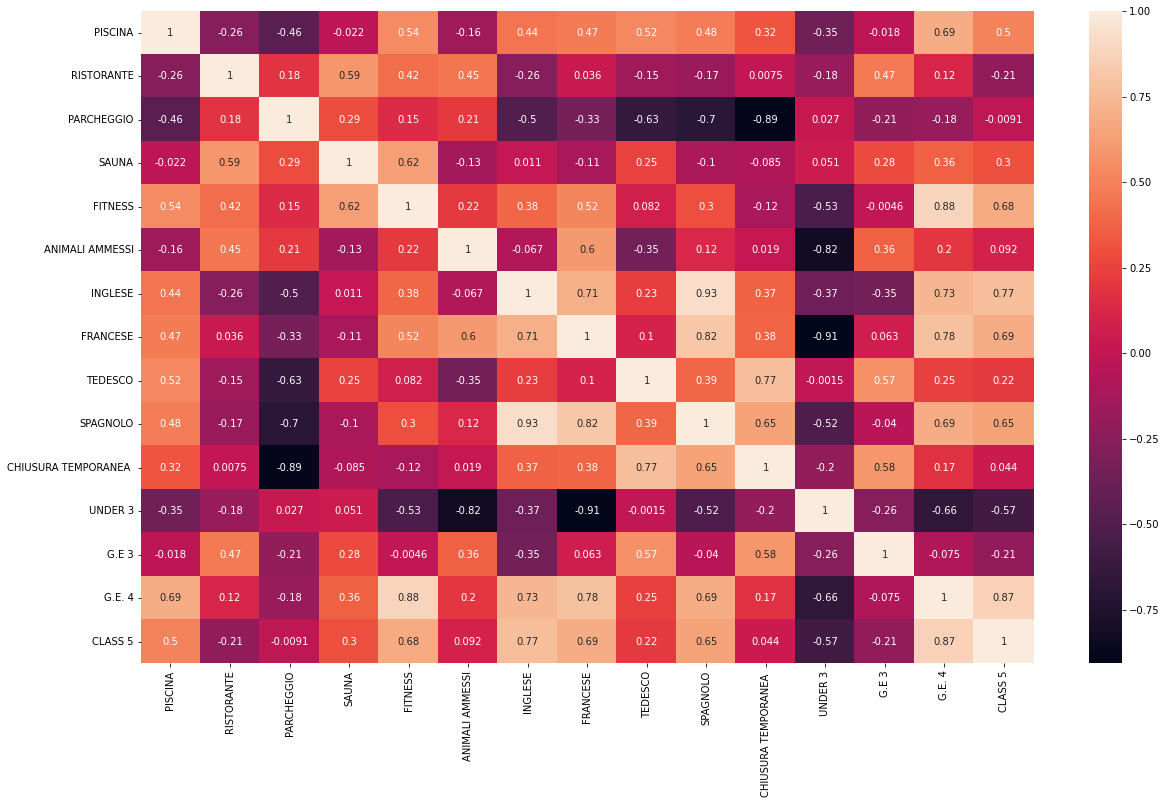

In [212]:
## heatmap 

plt.figure(figsize=(20,12))
sb.heatmap(tr_corr, annot=True)

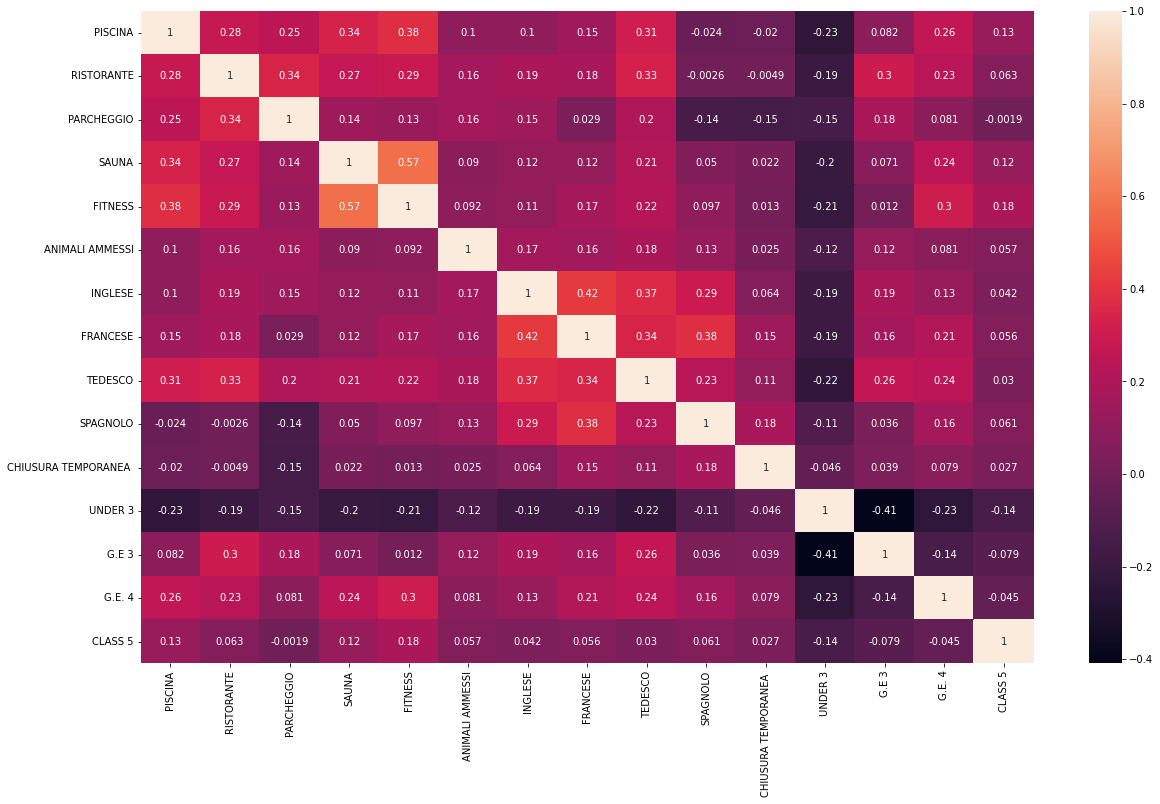

In [213]:
## HEATMAP

plt.figure(figsize=(20,12))
sb.heatmap(tr_df.corr(), annot=True)

In [214]:
tr_df

,PROVINCIA,COMUNE,TIPOLOGIA,DENOMINAZIONE,PISCINA,RISTORANTE,PARCHEGGIO,SAUNA,FITNESS,ANIMALI AMMESSI,INGLESE,FRANCESE,TEDESCO,SPAGNOLO,CHIUSURA TEMPORANEA,CLASSIFICAZIONE,UNDER 3,G.E 3,G.E. 4,CLASS 5
0,BELLUNO,AGORDO,ALBERGO,ERICE,0,1,1,0,0,0,1,0,1,0,0,3,0,1,0,0
1,BELLUNO,AGORDO,ALBERGO,PENSIONE DUE ANGELI,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,BELLUNO,AGORDO,ALBERGO,VILLA IMPERINA,0,1,1,1,1,1,1,1,1,1,0,3,0,1,0,0
3,BELLUNO,AGORDO,BED AND BREAKFAST,B&B VILLA BELVEDERE - (temp. chiusa),0,0,1,0,0,1,1,0,0,0,1,4,0,0,0,0
4,BELLUNO,AGORDO,BED AND BREAKFAST,BED & BREAKFAST SOL FIORI',0,0,1,0,0,0,1,0,1,0,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,VICENZA,ZOVENCEDO,CAMERE,PICCOLO MONDO,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0
7333,VICENZA,ZOVENCEDO,CAMERE,VILLA BONIN,0,1,1,0,0,0,1,0,0,0,0,3,0,0,0,0
7334,VICENZA,ZUGLIANO,ALBERGO,CUNICO,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0
7335,VICENZA,ZUGLIANO,BED AND BREAKFAST,B&B DALLA COSTA EDWARD,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0


In [215]:
tr_df.corr()

,PISCINA,RISTORANTE,PARCHEGGIO,SAUNA,FITNESS,ANIMALI AMMESSI,INGLESE,FRANCESE,TEDESCO,SPAGNOLO,CHIUSURA TEMPORANEA,UNDER 3,G.E 3,G.E. 4,CLASS 5
PISCINA,1.000000,0.280187,0.246454,0.338119,0.381682,0.101010,0.102576,0.149701,0.309140,-0.024073,-0.019671,-0.228182,0.081591,0.261096,0.125864
RISTORANTE,0.280187,1.000000,0.342670,0.273508,0.285157,0.159781,0.185772,0.179191,0.332715,-0.002567,-0.004886,-0.190050,0.296342,0.229773,0.062647
PARCHEGGIO,0.246454,0.342670,1.000000,0.144501,0.132631,0.164488,0.146086,0.029157,0.204139,-0.143478,-0.150335,-0.147174,0.182875,0.081011,-0.001850
SAUNA,0.338119,0.273508,0.144501,1.000000,0.573482,0.089770,0.116603,0.118801,0.211066,0.050203,0.022218,-0.196578,0.070592,0.241930,0.123518
FITNESS,0.381682,0.285157,0.132631,0.573482,1.000000,0.092499,0.110489,0.172003,0.223839,0.097452,0.013046,-0.206078,0.011504,0.304111,0.183192
ANIMALI AMMESSI,0.101010,0.159781,0.164488,0.089770,0.092499,1.000000,0.168858,0.157388,0.181613,0.126500,0.024757,-0.124082,0.119375,0.080770,0.056679
INGLESE,0.102576,0.185772,0.146086,0.116603,0.110489,0.168858,1.000000,0.416784,0.366661,0.290746,0.063948,-0.188720,0.185940,0.125655,0.041948
FRANCESE,0.149701,0.179191,0.029157,0.118801,0.172003,0.157388,0.416784,1.000000,0.344786,0.382261,0.148059,-0.185838,0.164837,0.210055,0.056405
TEDESCO,0.309140,0.332715,0.204139,0.211066,0.223839,0.181613,0.366661,0.344786,1.000000,0.225108,0.109882,-0.222331,0.262908,0.243970,0.030142
SPAGNOLO,-0.024073,-0.002567,-0.143478,0.050203,0.097452,0.126500,0.290746,0.382261,0.225108,1.000000,0.176968,-0.113622,0.036418,0.158016,0.061254


In [216]:
## class distribution

tr_df['INGLESE'].value_counts()

1    5821
0    1516
Name: INGLESE, dtype: int64

In [217]:
## checking null values

tr_df.isnull().sum()

PROVINCIA               0
COMUNE                  0
TIPOLOGIA               0
DENOMINAZIONE           0
PISCINA                 0
RISTORANTE              0
PARCHEGGIO              0
SAUNA                   0
FITNESS                 0
ANIMALI AMMESSI         0
INGLESE                 0
FRANCESE                0
TEDESCO                 0
SPAGNOLO                0
CHIUSURA TEMPORANEA     0
CLASSIFICAZIONE         0
UNDER 3                 0
G.E 3                   0
G.E. 4                  0
CLASS 5                 0
dtype: int64

In [218]:
tr_df.drop(columns=['PROVINCIA','COMUNE','TIPOLOGIA','DENOMINAZIONE','CLASSIFICAZIONE'])

,PISCINA,RISTORANTE,PARCHEGGIO,SAUNA,FITNESS,ANIMALI AMMESSI,INGLESE,FRANCESE,TEDESCO,SPAGNOLO,CHIUSURA TEMPORANEA,UNDER 3,G.E 3,G.E. 4,CLASS 5
0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,1,1,1,1,1,1,1,0,0,1,0,0
3,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
7333,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
7334,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
7335,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [219]:
tr_copy = tr_df.drop(columns=['PROVINCIA','COMUNE','TIPOLOGIA','DENOMINAZIONE','CLASSIFICAZIONE']).copy()

# Select Features
feature = tr_copy.drop(columns=['UNDER 3'])

# Select Target
target = tr_copy['UNDER 3']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (5869, 14)
Shape of testing feature: (1468, 14)
Shape of training label: (5869,)
Shape of training label: (1468,)


In [220]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
  
  

In [221]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.7057220708446866
Precision: 0.6342525399129173
Recall: 0.7082658022690438
F1 Score: 0.669218989280245
Cohens Kappa Score: 0.4056357089435436
Area Under Curve: 0.7890021654379346
Confusion Matrix:
 [[599 252]
 [180 437]]


In [222]:
language=[]
for i in range(len(tr_df)):
  if (tr_df['INGLESE'][i] == 1) & (tr_df['TEDESCO'][i] == 1) & (tr_df['SPAGNOLO'][i] == 1) & (tr_df['FRANCESE'][i] == 1) :
    language.append(1)
  else:
    language.append(0)

tr_df['LANGUAGES'] = language


<ipython-input-222-710ddfed3c60>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df['LANGUAGES'] = language


In [223]:
tr_df.columns

Index(['PROVINCIA', 'COMUNE', 'TIPOLOGIA', 'DENOMINAZIONE', 'PISCINA',
       'RISTORANTE', 'PARCHEGGIO', 'SAUNA', 'FITNESS', 'ANIMALI AMMESSI',
       'INGLESE', 'FRANCESE', 'TEDESCO', 'SPAGNOLO', 'CHIUSURA TEMPORANEA ',
       'CLASSIFICAZIONE', 'UNDER 3', 'G.E 3', 'G.E. 4', 'CLASS 5',
       'LANGUAGES'],
      dtype='object')

In [224]:
## linear regression

import sklearn
from sklearn.linear_model import LinearRegression

y_under_3 = tr_df['G.E. 4']
y_over_3 = tr_df['CLASS 5']

x_english = tr_df['INGLESE']
x_pool = tr_df['PISCINA']

X = tr_df[['INGLESE','PISCINA','PARCHEGGIO','FITNESS','SAUNA','RISTORANTE']]

reg=LinearRegression().fit(X,y_under_3)

intercept_label = ['intercept']
coeff_df = pd.DataFrame([*intercept_label,*X.columns])
coeff_df.columns = ['Predictors']
coeff_df['Coefficients'] = [*[reg.intercept_], *reg.coef_]

coeff_df



,Predictors,Coefficients
0,intercept,-0.002288
1,INGLESE,0.043079
2,PISCINA,0.100884
3,PARCHEGGIO,-0.021426
4,FITNESS,0.191748
5,SAUNA,0.053326
6,RISTORANTE,0.067719
